### The collection of plots of this notebook is meant to be an overview of the characteristics of the metadata of INSTANCE. 


In [1]:
%matplotlib inline

import sys
import pandas as pd
import numpy as np
import os

from scipy import stats
import scipy.constants
from obspy import UTCDateTime

import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker


# acceleration of gravity constant in meters/s**2
GACC_m = scipy.constants.g
GACC_cm = GACC_m * 100

pd.options.display.max_columns = None

## Load plot function definition

#### Main functions used to plot the data:
 - ***plot_pie_panels()***      &emsp;   *Pie plots*   
 - ***plot_hexbin_panels()***   &emsp;   *Hexbin plots*  
 - ***plot_histo_panels()***    &emsp;   *Plot histograms*  

___More details about the parameters are available in the declaration file Plot_Functions.py___

In [2]:
sys.path.append('./Plot_Functions.py')

In [3]:
# Some usefull functions
from Plot_Functions import split, detect_time, bin_width, my_ceil, my_floor, round_up

# Load of the plot functions
from Plot_Functions import plot_subplot, hist_subplot
from Plot_Functions import plot_hexbin_panels, plot_histogram, plot_histo_panels, plot_pie_panels

## Set the dimension of the figure

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Figure labels

In [5]:
fignumbers = 'abcdefghijklmnopqrstuvwxyz'
alllabs = split(fignumbers)

# Metadata event plots

### Load the metadata of the events from the csv file

In [6]:
FIGDIR = '../samples'
METADIR = '../metadata/'

fname = 'metadata_Events_10k.csv'
infile = os.path.join(METADIR,fname)

noisename='metadata_Noise_10k.csv'
noisefile = os.path.join(METADIR,noisename)

%time df_metadata = pd.read_csv(infile, dtype={'station_location_code': object})

CPU times: user 178 ms, sys: 56.2 ms, total: 234 ms
Wall time: 232 ms


## Figure 3
### Histograms of the distribution of the trace records composing the dataset according to:
- magnitude (a)
- epicentral distances (b)
- earthquake depth (c)
- backazimuth (d)

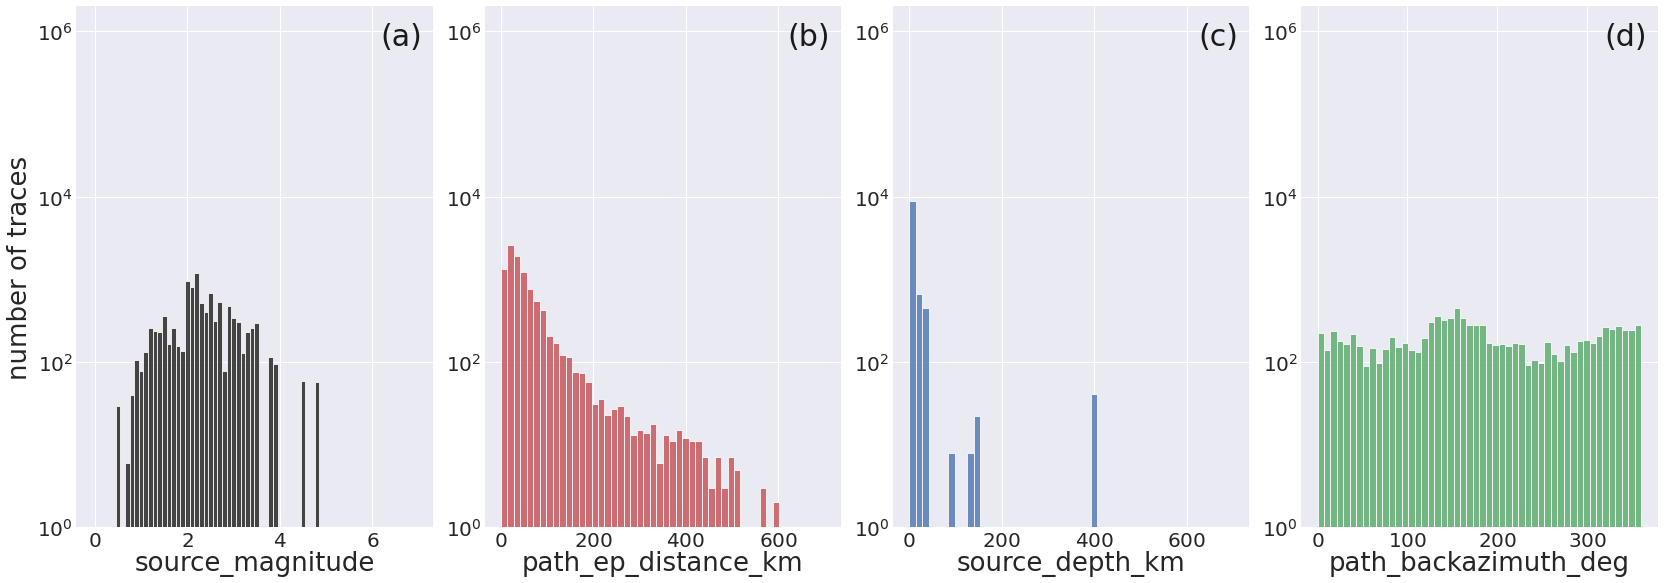

In [7]:
cols = ['source_magnitude','path_ep_distance_km', 'source_depth_km','path_backazimuth_deg']

ncols = 4
nrows = 1

bin_edges = bin_width(0,7,0.1)

bins = [bin_edges,50,50,50]

ylabel_text = ['number of traces','','','']


lfs=26   # label font size
tlfs=20  # tick label font size

label_font_size=lfs*np.ones(ncols*nrows)
tick_label_font_size =tlfs*np.ones(ncols*nrows)

n_x_ticks=[5,6,6,6]  # number of ticks in the x axis
n_y_ticks=[5,6,6,4]

#
labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=30
#
colors = ['k','r','b','g']
logs = [True,True,True,True]

ranges = [[0,7,1,2000000],[0,700,1,2000000],[0,700,1,2000000],[0,360,1,2000000] ]

style_label = 'seaborn-darkgrid'
#
fig = plot_histo_panels(style_label,df_metadata,cols,ncols,nrows,bins,ylabel_text,label_font_size,
                        tick_label_font_size,labs, colors,logs,ranges, n_x_ticks=n_x_ticks, n_y_ticks=n_y_ticks, fontsize=fontsize, c=color)

#figname = os.path.join(FIGDIR, "mag_distances_ep_LOG.png")
#plt.savefig(figname)
plt.show()

## Figure 4
### Diagrams of the magnitude distribution versus distance as hexbin plot

gridsize (100, 35)


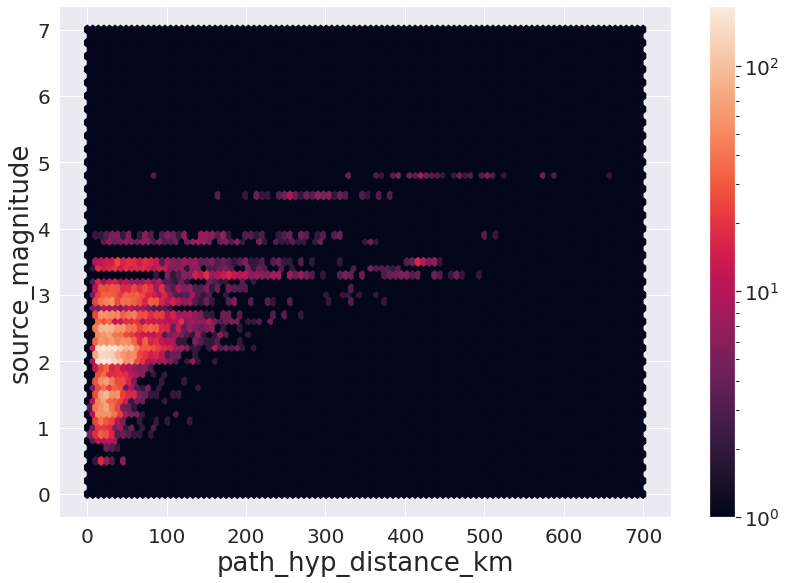

In [8]:
cols = [['path_hyp_distance_km','source_magnitude']]  

label_font_size = [26]
#
tick_label_font_size = [20]

ncols = 1
nrows = 1

#
logs = [[False,False], [False,False]
       ]

ranges = [[0,700,0,7.]
         ]
bins=['log']

labs = alllabs[:(ncols*nrows)]
gridsize = 50

style_label = 'seaborn-deep'

fig = plot_hexbin_panels(style_label, df_metadata, cols, ncols, nrows,
                          label_font_size, tick_label_font_size, labs, colors, logs, ranges, bins, gridsize = (100,35))#, set_letter=False)

#figname = os.path.join(FIGDIR, "hypdistance_M_hexbin.png")
#plt.savefig(figname)

plt.show()

## Figure 5
### Pie diagrams summarizing the distribution of:
- the channels (a)  
- the data contributing networks (b)  
- the P-wave polarities (c)  
- the magnitude types of the dataset (d)

In [9]:
df_grouped = []
cols = ['station_channels', 'station_network_code','trace_polarity', 'source_magnitude_type']

for col in cols:
    df_grouped.append(df_metadata.groupby(col).count())
nrows,ncols = (2,2)

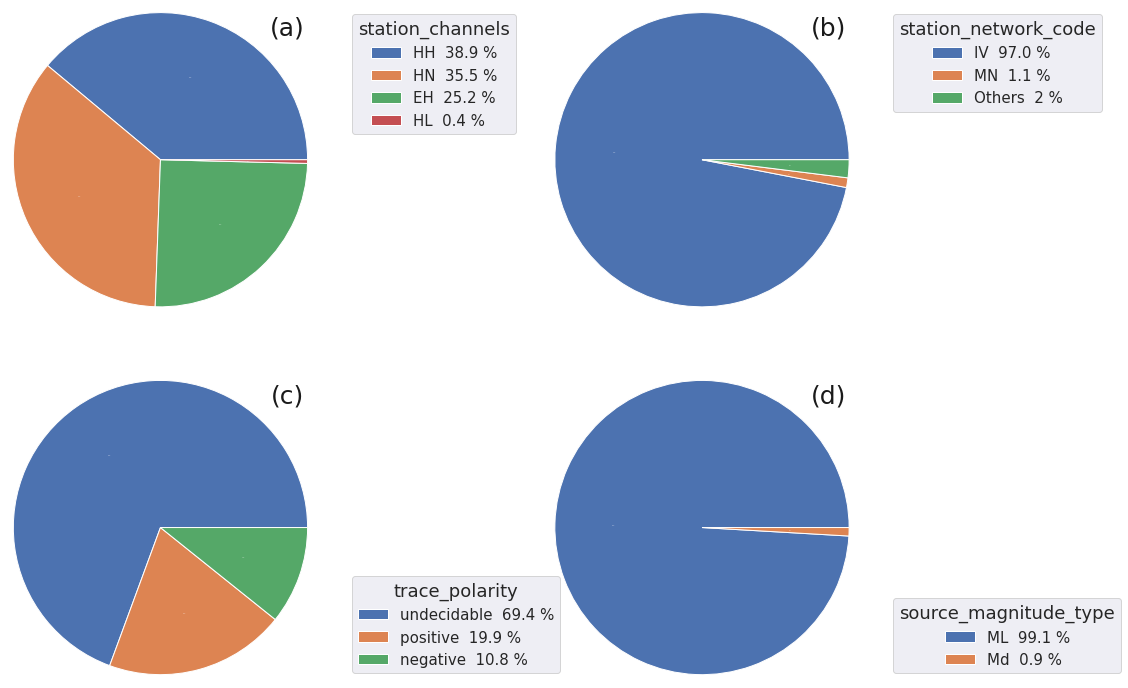

In [10]:
lfs=18   # label font size
tlfs=15  # tick label font size
fontsize=25   

label_font_size=lfs*np.ones(ncols*nrows)
tick_font_size=tlfs*np.ones(ncols*nrows)

labs = alllabs[:(ncols*nrows)]
color='k'       

PercMIN=[0.0001, 1, 0.1,0.1 ]   
fig = plot_pie_panels(df_grouped, cols, ncols, nrows, label_font_size, tick_font_size, left=-0.1, wspace=-0.25, fontsize=fontsize, PercMIN=PercMIN, c=color, labs=labs)

#figname = os.path.join(FIGDIR, "pie_cha_net_pol_mag.png")
#plt.savefig(figname)
plt.show()

## Figure 6
### Histograms of:
- (a,c) &emsp; The P- and S-wave residuals 
- (b,d) &emsp; The phase arrival weights, expressed as percent, resulting from the location


/homes/cianetti/.conda/envs/gpd/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/homes/cianetti/.conda/envs/gpd/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


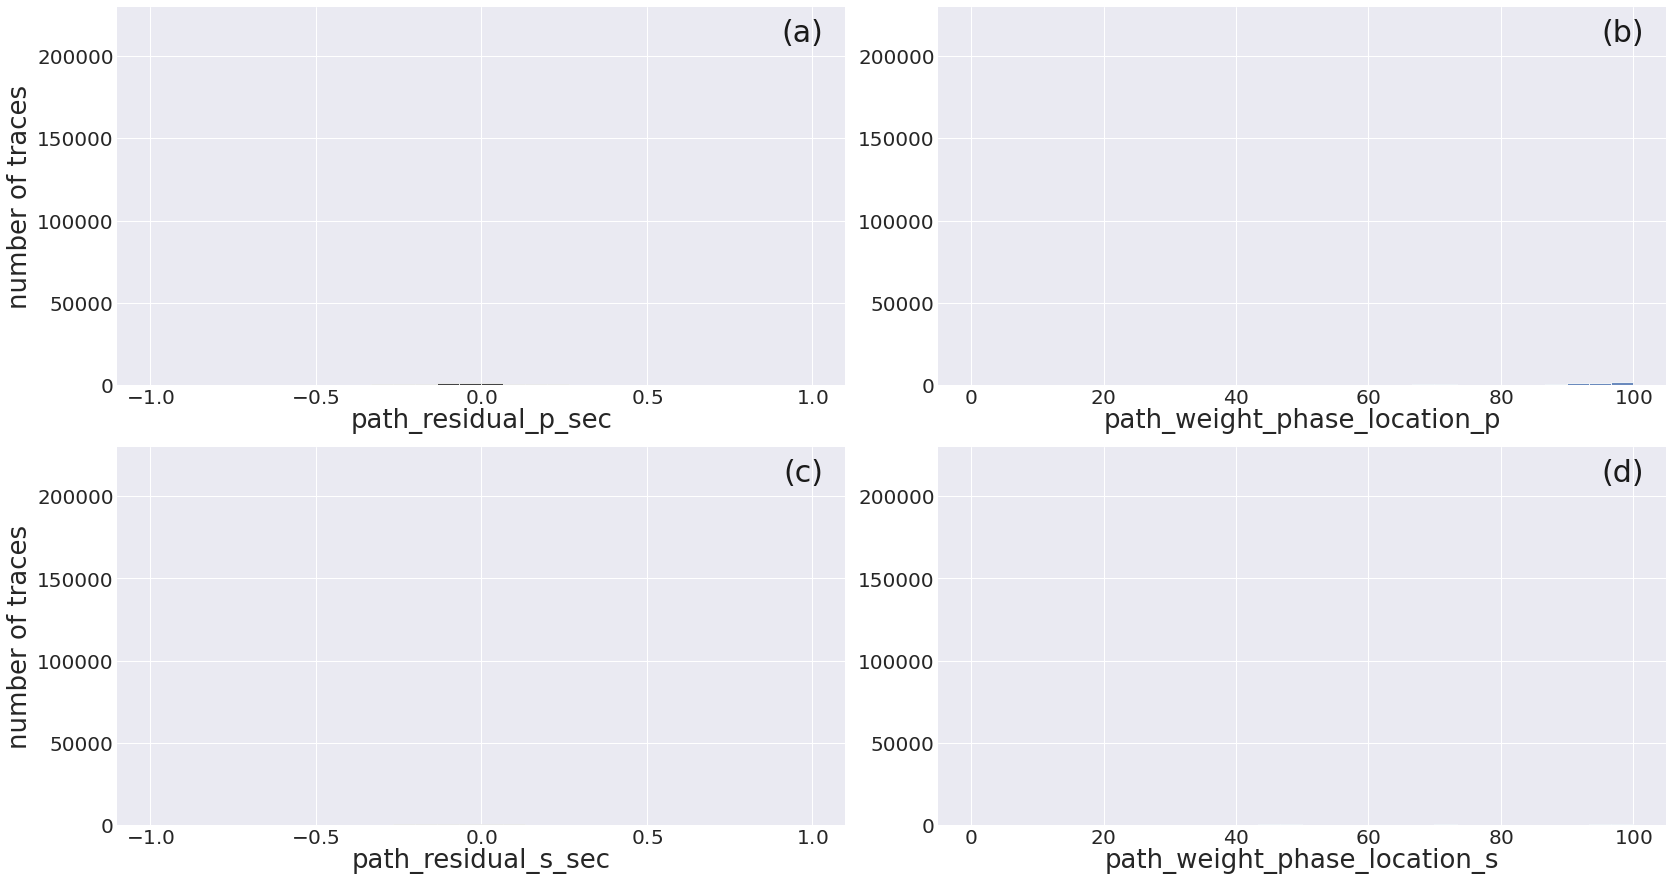

In [11]:
cols = ['path_residual_p_sec','path_weight_phase_location_p',
        'path_residual_s_sec','path_weight_phase_location_s' ]

bins = [30,30,
        30,30
       ]

ylabel_text = ['number of traces','','number of traces','']

lfs=26   # label font size
tlfs=20  # tick label font size
n_p=4
n_x_ticks=[7,6,
          7,6]  # number of ticks in the x axis
n_y_ticks=[5,5,
          5,5]

label_font_size=lfs*np.ones(n_p)
tick_label_font_size =tlfs*np.ones(n_p)

ncols = 2
nrows = 2
#
labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=30
#
colors = ['k','b',
          'k','b'
         ]

logs = [False,False,False,False]


ranges = [[-1,1,0,230000],[0,100,0,230000],
          [-1,1,0,230000],[0,100,0,230000]]

style_label = 'seaborn-darkgrid'
#
fig = plot_histo_panels(style_label,df_metadata,cols,ncols,nrows,bins,ylabel_text,
                        label_font_size,tick_label_font_size,labs, colors,logs,ranges, n_x_ticks=n_x_ticks, n_y_ticks=n_y_ticks, fontsize=fontsize, c=color)

#igname = os.path.join(FIGDIR, "residuals.png")
#plt.savefig(figname)
plt.show()

## Figure 7
### Hexbin plot of the traveltimes for different distance ranges for P and S-waves**
- 0-700 km  &emsp; --> &emsp; Figures (a,e)
- 0-200 km  &emsp; --> &emsp; Figures (b,f)
- 0-100 km  &emsp; --> &emsp; Figures (c,g)
- 0-40 km   &emsp; --> &emsp; Figures (d,h)

gridsize 200
[0, 700, 0, 150]
[0, 200, 0, 50]
[0, 100, 0, 30]
[0, 40, 0, 18]
[0, 700, 0, 150]
[0, 200, 0, 50]
[0, 100, 0, 30]
[0, 40, 0, 18]


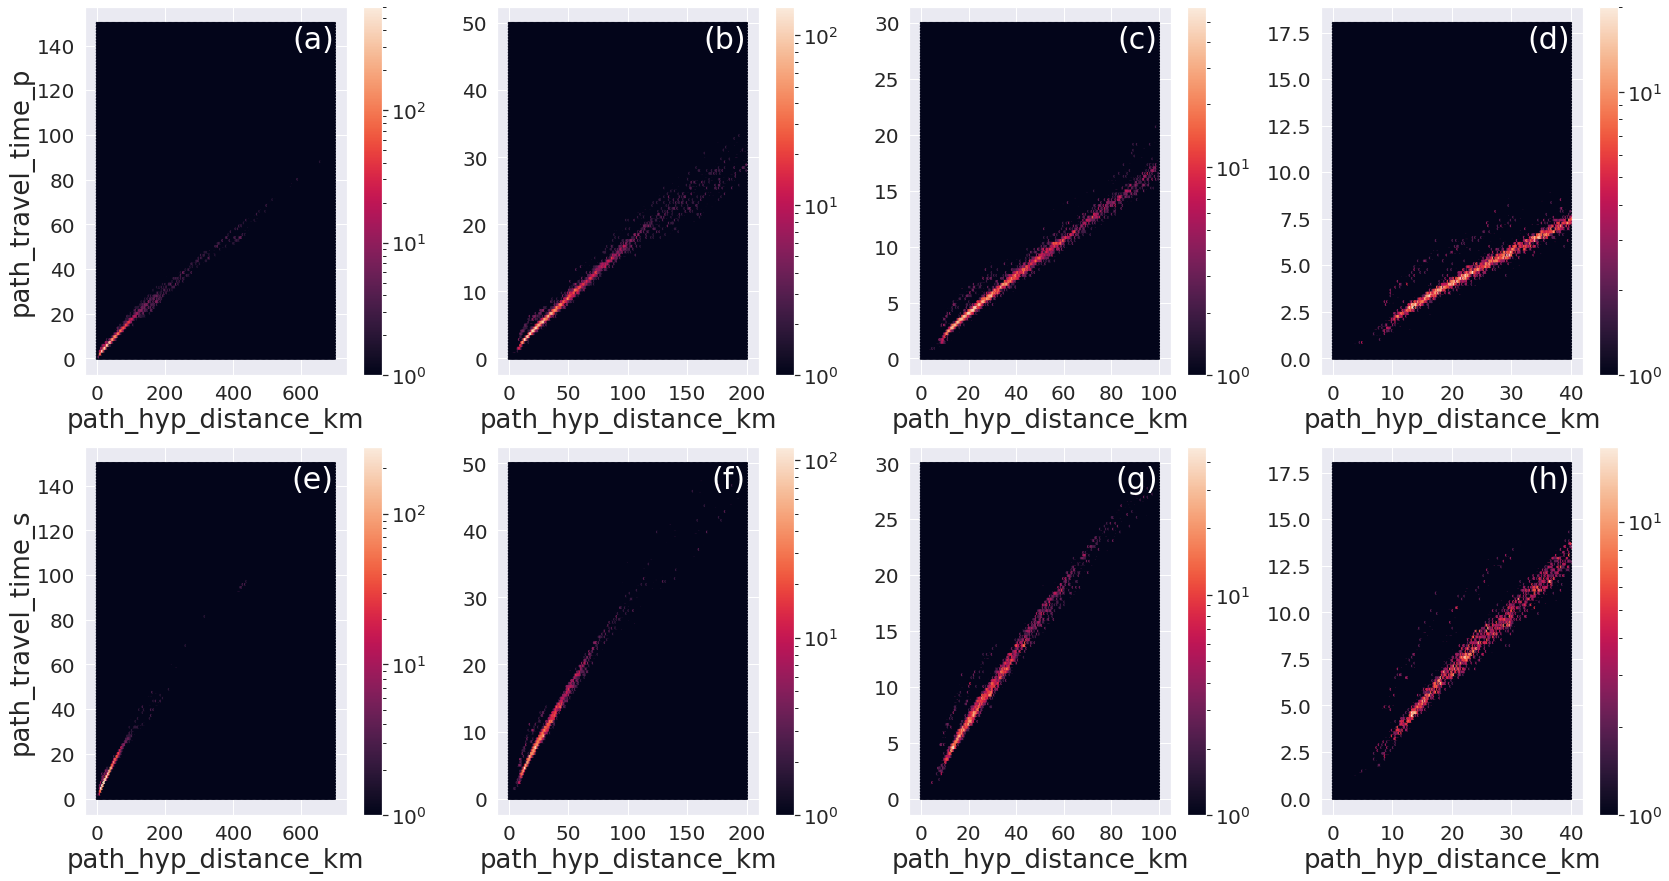

In [12]:
cols = [['path_hyp_distance_km','path_travel_time_p'],
        ['path_hyp_distance_km','path_travel_time_p'],
        ['path_hyp_distance_km','path_travel_time_p'],
        ['path_hyp_distance_km','path_travel_time_p'],
        ['path_hyp_distance_km','path_travel_time_s'],
        ['path_hyp_distance_km','path_travel_time_s'],
        ['path_hyp_distance_km','path_travel_time_s'],
        ['path_hyp_distance_km','path_travel_time_s']
       ]

ylabel_text = ['path_travel_time_p','','','',
                'path_travel_time_s', '','','']

lfs=26   # label font size
tlfs=20  # tick label font size
ncols = 4
nrows = 2

n_x_ticks=ncols  # number of ticks in the x axis
n_y_ticks=nrows

label_font_size=lfs*np.ones(ncols*nrows)
tick_label_font_size =tlfs*np.ones(ncols*nrows)

#
logs = [[False,False], [False,False],
        [False,False], [False,False],
        [False,False], [False,False],
        [False,False], [False,False]
       ]

ranges = [[0,700,0,150], [0,200,0,50],[0,100,0,30],[0,40,0,18],
          [0,700,0,150], [0,200,0,50],[0,100,0,30], [0,40,0,18]        
         ]

bins=['log','log','log','log','log','log','log','log']
colors = ['b','r','b','r', 'b','r','b','r']
#
labs = alllabs[:(ncols*nrows)]

style_label = 'seaborn-deep'

fig = plot_hexbin_panels(style_label, df_metadata, cols, ncols, nrows,
                          label_font_size, tick_label_font_size, labs, colors, logs, ranges,bins, ylabel_text=ylabel_text, gridsize=200)

#figname = os.path.join(FIGDIR, "traveltimes_4dists_hexbin.png")
#plt.savefig(figname)

plt.show()

## Figure 8
### Histogram of the distribution of the median and mean values of the earthquake waveform traces.

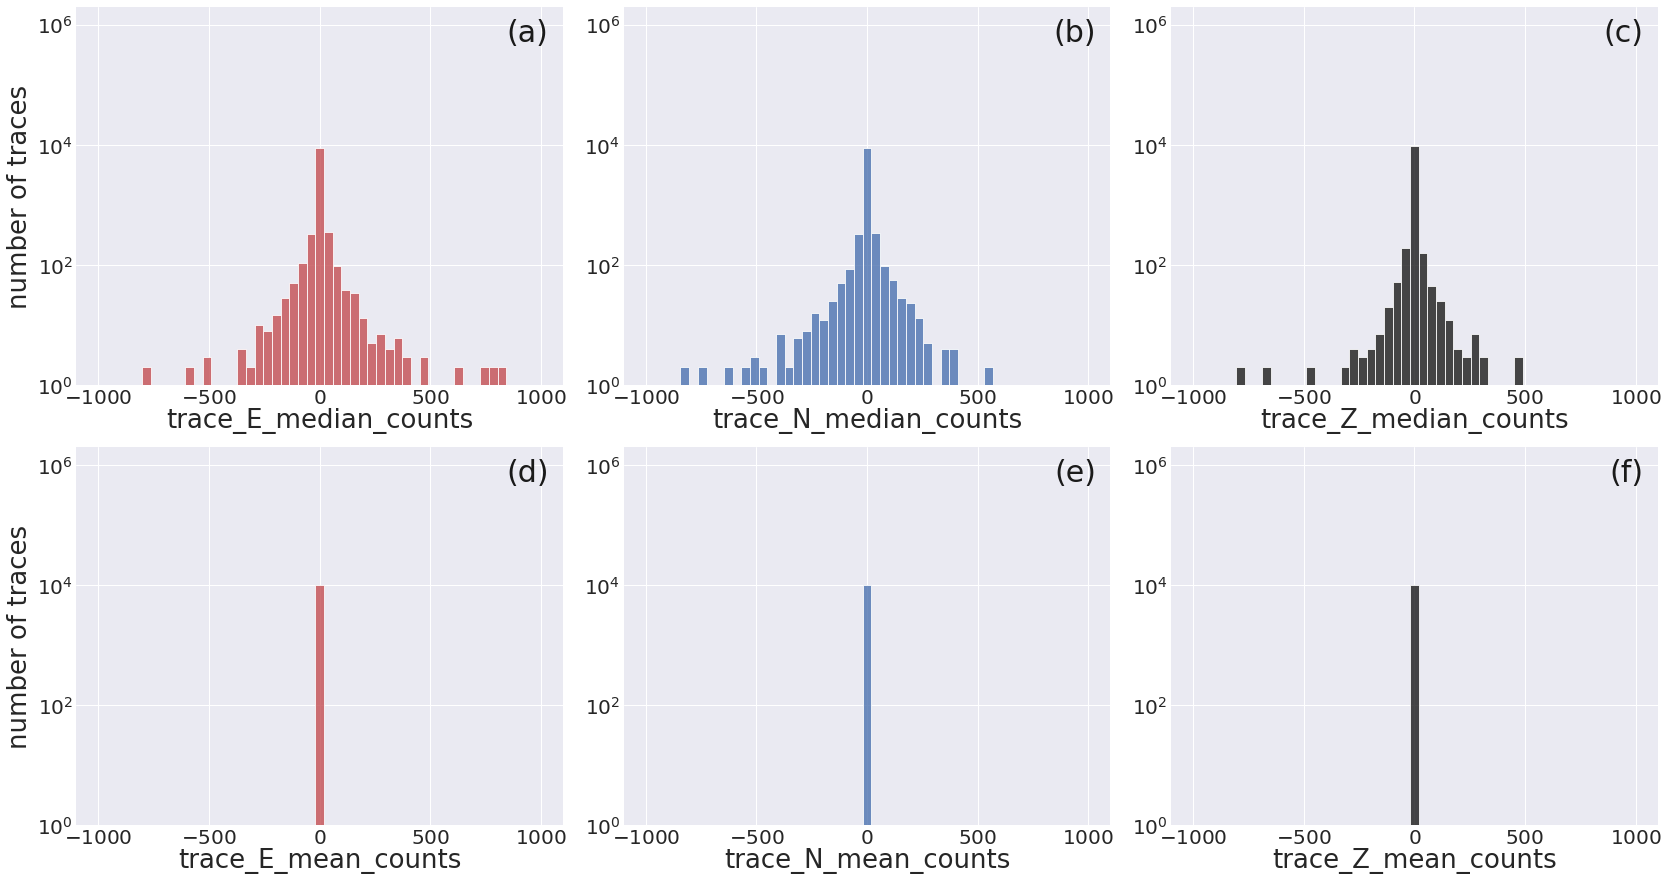

In [14]:
ncols = 3
nrows = 2

cols = ['trace_E_median_counts','trace_N_median_counts','trace_Z_median_counts',
        'trace_E_mean_counts','trace_N_mean_counts','trace_Z_mean_counts'
       ]

bins = [51,51,51,
        51,51,51]

ylabel_text = ['number of traces','','','number of traces','','']

lfs=26   # label font size
tlfs=20  # tick label font size

label_font_size=lfs*np.ones(nrows*ncols)
tick_label_font_size =tlfs*np.ones(nrows*ncols)

n_x_ticks=[5,5,5,
          5,5,5]  # number of ticks in the x axis
n_y_ticks=[4,4,4,
           4,4,4]


colors = ['r','b','k','r','b','k']

labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=30

logs = [True,True,True,
        True,True,True]

ranges = [[-1000,1000,1,2000000],[-1000,1000,1,2000000],[-1000,1000,1,2000000],
          [-1000,1000,1,2000000],[-1000,1000,1,2000000],[-1000,1000,1,2000000]
         ]

style_label = 'seaborn-darkgrid'
#
fig = plot_histo_panels(style_label,df_metadata,cols,ncols,nrows,bins,ylabel_text,
                        label_font_size,tick_label_font_size,labs, colors,logs,ranges, n_x_ticks=n_x_ticks, n_y_ticks=n_y_ticks, c=color, fontsize=fontsize)

#figname = os.path.join(FIGDIR, "median_mean_log.png")
#plt.savefig(figname)
plt.show()

## Figure 9
 **Histogram of the distribution of quality control metadata of the earthquake waveform traces: rms, min, max, first and third quartile. The width of the bins is $2 × 10^3 $**

/homes/cianetti/.conda/envs/gpd/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/homes/cianetti/.conda/envs/gpd/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


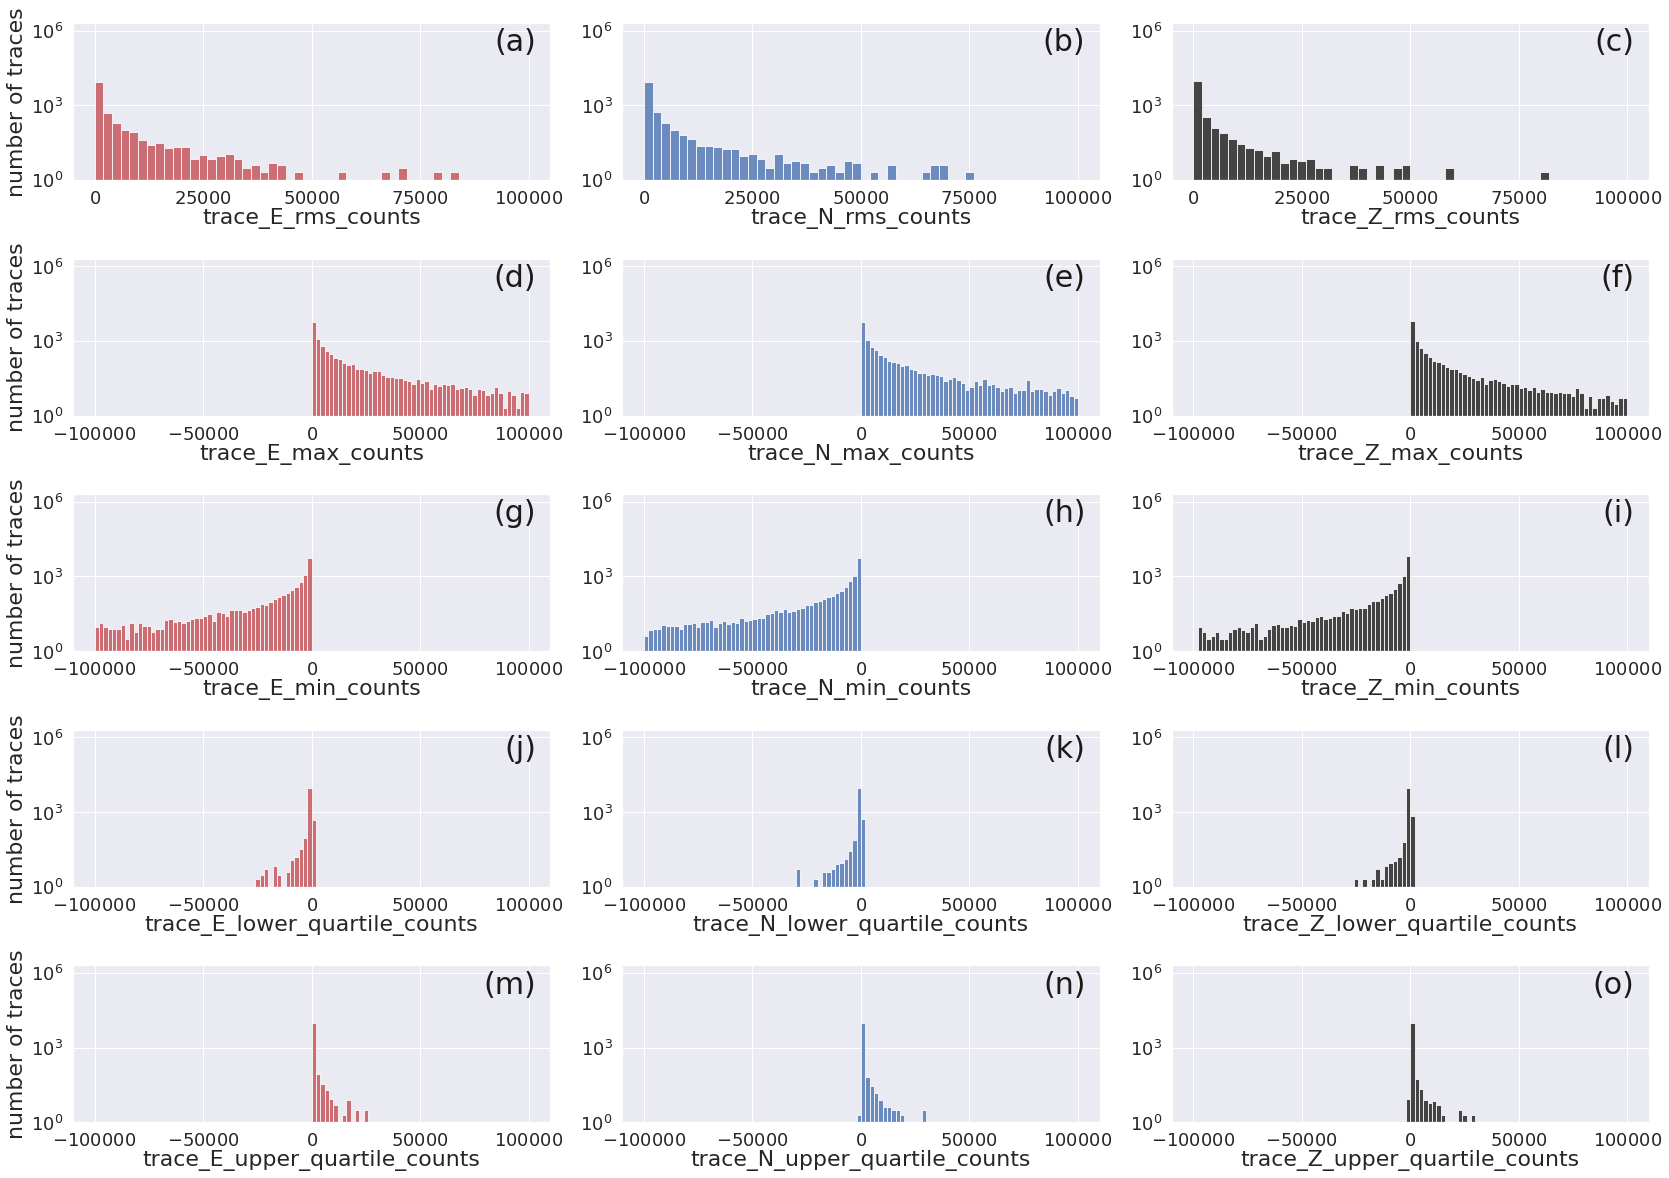

In [15]:
ncols = 3
nrows = 5

cols = [
        'trace_E_rms_counts','trace_N_rms_counts','trace_Z_rms_counts',
        'trace_E_max_counts','trace_N_max_counts','trace_Z_max_counts',
        'trace_E_min_counts','trace_N_min_counts','trace_Z_min_counts',
        'trace_E_lower_quartile_counts','trace_N_lower_quartile_counts','trace_Z_lower_quartile_counts',
        'trace_E_upper_quartile_counts','trace_N_upper_quartile_counts','trace_Z_upper_quartile_counts'
       ]

bins = [50,50,50,
        100,100,100,
        100,100,100,
        100,100,100,
        100,100,100]

ylabel_text = ['number of traces','','',
               'number of traces','','',
               'number of traces','','',
               'number of traces','','',
               'number of traces','','']

lfs=22   # label font size
tlfs=18  # tick label font size
n_p=15
n_x_ticks=[6,6,6,
           7,7,7,
           7,7,7,
           7,7,7,
           7,7,7]  # number of ticks in the x axis
n_y_ticks=[ 3,3,3,
          3,3,3,
          3,3,3,
          3,3,3,
          3,3,3]

label_font_size=lfs*np.ones(n_p)
tick_label_font_size =tlfs*np.ones(n_p)

labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=30

#
colors = ['r','b','k','r','b','k','r','b','k','r','b','k','r','b','k']

x_logs = [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True]
logs = [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True]


n_x_ticks = [5,5,5,
            6,6,6,
            6,6,6,
            6,6,6,
            6,6,6]

ranges = [
          [0,1e5,1,2000000],[0,1e5,1,2000000],[0,1e5,1,2000000],
          [-1e5,1e5,1,2000000],[-1e5,1e5,1,2000000],[-1e5,1e5,1,2000000],
          [-1e5,1e5,1,2000000],[-1e5,1e5,1,2000000],[-1e5,1e5,1,2000000],
          [-1e5,1e5,1,2000000],[-1e5,1e5,1,2000000],[-1e5,1e5,1,2000000],
          [-1e5,1e5,1,2000000],[-1e5,1e5,1,2000000],[-1e5,1e5,1,2000000]]

style_label = 'seaborn-deep'

fig = plot_histo_panels(style_label,df_metadata,cols,ncols,nrows,bins,ylabel_text,label_font_size,
                        tick_label_font_size,labs, colors,logs,ranges, n_x_ticks=n_x_ticks, n_y_ticks=n_y_ticks, c=color, fontsize=fontsize)

#figname = os.path.join(FIGDIR, "QC_params_1_zoom.png")
#plt.savefig(figname)
plt.show()

## Figure 10
### Distribution of the signal-to-noise ratio of the earthquake waveform traces.

/homes/cianetti/.conda/envs/gpd/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/homes/cianetti/.conda/envs/gpd/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


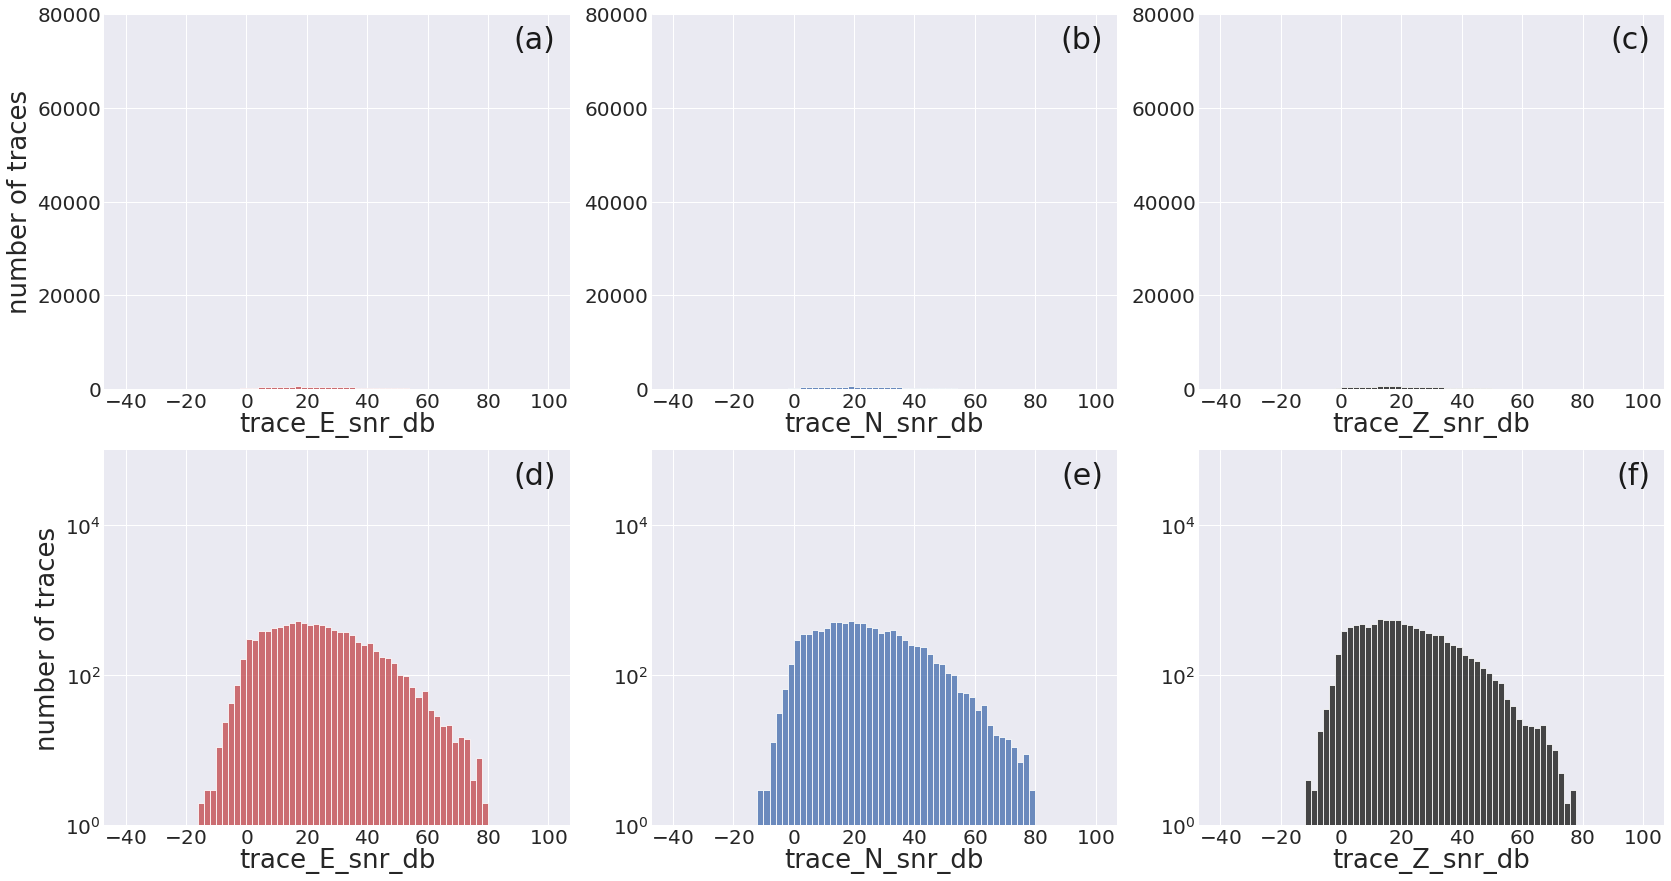

In [16]:
cols = ['trace_E_snr_db','trace_N_snr_db','trace_Z_snr_db',
        'trace_E_snr_db','trace_N_snr_db','trace_Z_snr_db']

bins = [70,70,70,70,70,70]
ylabel_text = ['number of traces','','','number of traces','','']

lfs=26   # label font size
tlfs=20  # tick label font size
n_p=6
n_x_ticks=4  # number of ticks in the x axis
n_y_ticks=[5,5,5,
           5,5,5]

label_font_size=lfs*np.ones(n_p)
tick_label_font_size =tlfs*np.ones(n_p)


ncols = 3
nrows = 2
#
colors = ['r','b','k','r','b','k']
logs = [False,False,False,True,True,True]

#
labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=30

ranges=[ [-40,100,0,80000], [-40,100,0,80000], [-40,100,0,80000],
         [-40,100,1,100000], [-40,100,1,100000], [-40,100,1,100000] ]

style_label = 'seaborn-darkgrid'
#
fig = plot_histo_panels(style_label,df_metadata,cols,ncols,nrows,bins,ylabel_text,label_font_size,
                        tick_label_font_size,labs,colors,logs,ranges, n_y_ticks=n_y_ticks, fontsize=fontsize, c=color)

#figname = os.path.join(FIGDIR, "snr_db_lin_log.png")
#plt.savefig(figname)
plt.show()

## Figure 11
### Hexbin representation of the distribution of the signal-to-noise ratio with distance and magnitude

In [17]:
df_metadata_M2p = df_metadata.loc[df_metadata.source_magnitude >= 2.0,['source_magnitude','path_hyp_distance_km', 'trace_E_snr_db', 'trace_N_snr_db', 'trace_Z_snr_db']]

In [18]:
df_metadata_M2p.describe()

,source_magnitude,path_hyp_distance_km,trace_E_snr_db,trace_N_snr_db,trace_Z_snr_db
count,7816.000000,7816.000000,7806.000000,7806.000000,7806.000000
mean,2.593321,65.571132,25.740029,25.921588,23.452599
std,0.549310,72.655864,15.737786,15.621945,15.050023
min,2.000000,7.598970,-18.678018,-14.363368,-14.714368
25%,2.200000,25.509393,13.917382,14.060069,12.173607
50%,2.500000,42.641187,24.721643,24.844946,21.908817
75%,2.900000,74.277265,36.292228,36.313528,33.438485
max,4.800000,656.374555,90.841900,88.064422,86.680097


gridsize 50
[0, 700, -30, 100]
[0, 700, -30, 100]
[0, 700, -30, 100]
[2, 7, -30, 100]
[2, 7, -30, 100]
[2, 7, -30, 100]


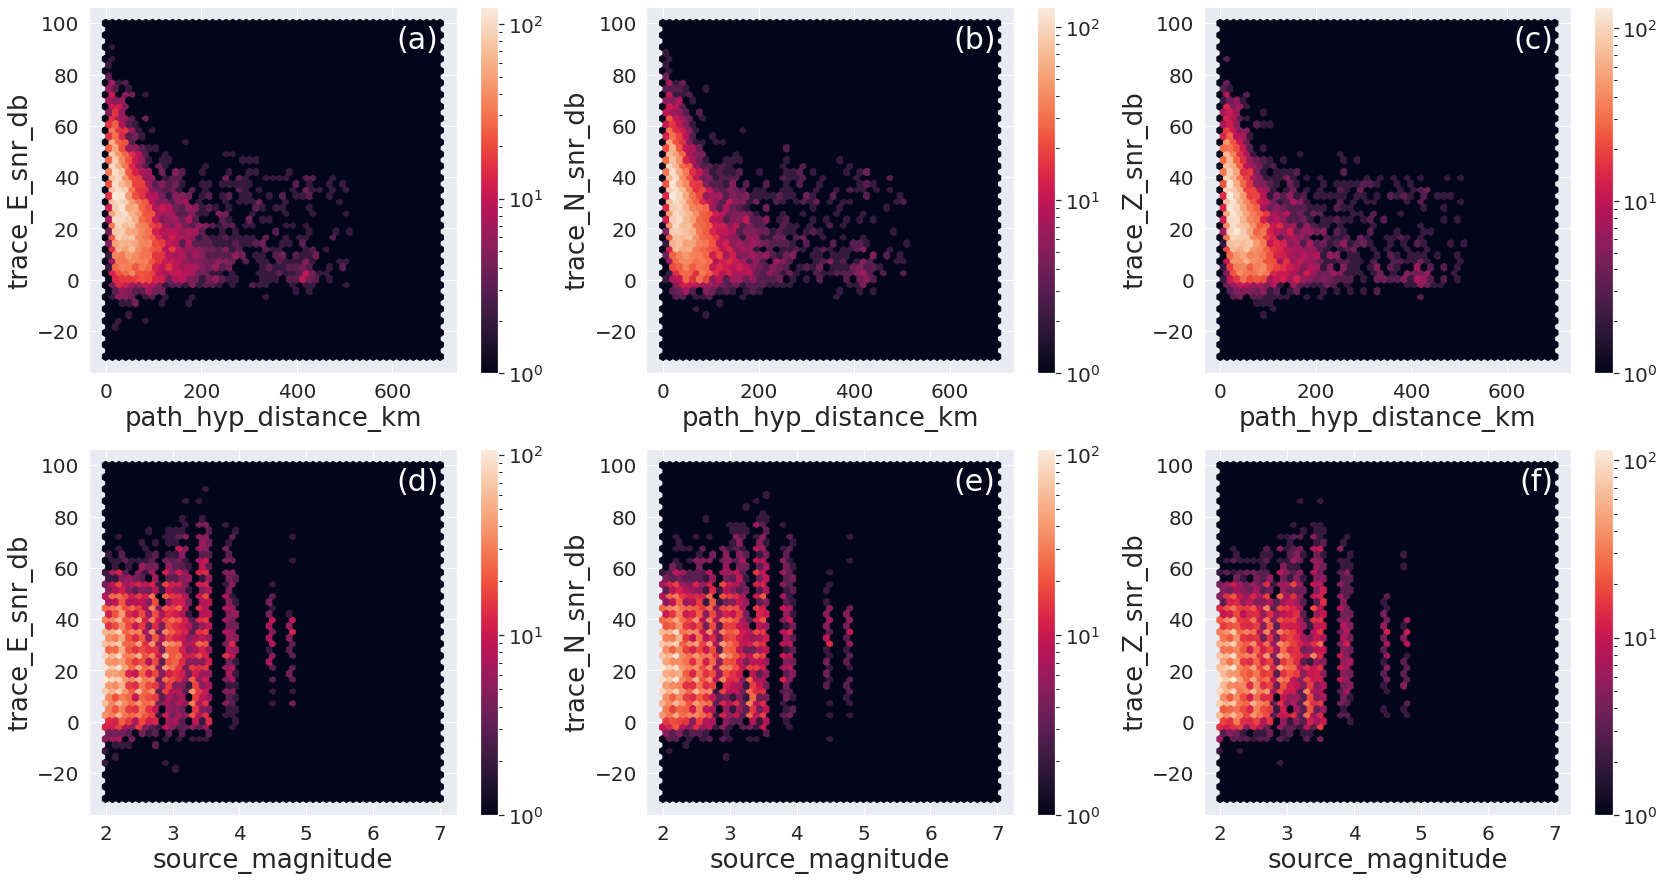

In [19]:
cols = [['path_hyp_distance_km','trace_E_snr_db'],
        ['path_hyp_distance_km','trace_N_snr_db'],  
        ['path_hyp_distance_km','trace_Z_snr_db'],
        ['source_magnitude','trace_E_snr_db'],
        ['source_magnitude','trace_N_snr_db'],  
        ['source_magnitude','trace_Z_snr_db']
       ]
ncols = 3
nrows = 2

lfs=26   # label font size
tlfs=20  # tick label font size

n_x_ticks=[5,5,5,
           6,6,6] # number of ticks in the x axis
n_y_ticks=7

label_font_size=lfs*np.ones(nrows*ncols)
tick_label_font_size =tlfs*np.ones(nrows*ncols)

#
labs = alllabs[:(ncols*nrows)]
#
logs = [[False,False], [False,False], [False,False], 
        [False,False], [False,False], [False,False]
       ]

ranges = [[0,700,-30,100],
          [0,700,-30,100],
          [0,700,-30,100],
          [2,7,-30,100],
          [2,7,-30,100],
          [2,7,-30,100]
         ]

bins=['log','log','log','log','log','log']

style_label = 'seaborn-deep'

fig = plot_hexbin_panels(style_label, df_metadata_M2p, cols, ncols, nrows,
                          label_font_size, tick_label_font_size, labs, colors, logs, ranges,bins, n_x_ticks=n_x_ticks,  gridsize = 50)

#figname = os.path.join(FIGDIR, "hypdistance_mag_snr_hexbin_M2p.png")
#plt.savefig(figname)

plt.show()

# Figure 12
###  Hexbin plot of the distribution of the intensity measures (IMs) with hypocentral distance for the M ≥ 2 earthquakes.

## Figure 13
### Hexbin plot of the distribution of the intensity measures (IMs) with hypocentral distance for M = 3 earthquakes.

In [20]:
df_meta_IMs_M3 = df_metadata.loc[(df_metadata.source_magnitude > 2.9) & (df_metadata.source_magnitude < 3.1)]
df_meta_IMs_M3.shape

(337, 117)

gridsize (100, 100)
[0.88541235641245297, 2.8450980400142569, -2.8566097462647129, 2.3424226808222062]
[0.88541235641245297, 2.8450980400142569, -4.4164993894987221, 1.7403626894942439]
[0.88541235641245297, 2.8450980400142569, -3.8481304218425372, 1.3424226808222062]
[0.88541235641245297, 2.8450980400142569, -3.7509950974792652, 3.0969100130080562]
[0.88541235641245297, 2.8450980400142569, -4.5705085111895309, 2.3324384599156054]
[0.88541235641245297, 2.8450980400142569, -4.9347411557830343, 0.90308998699194354]


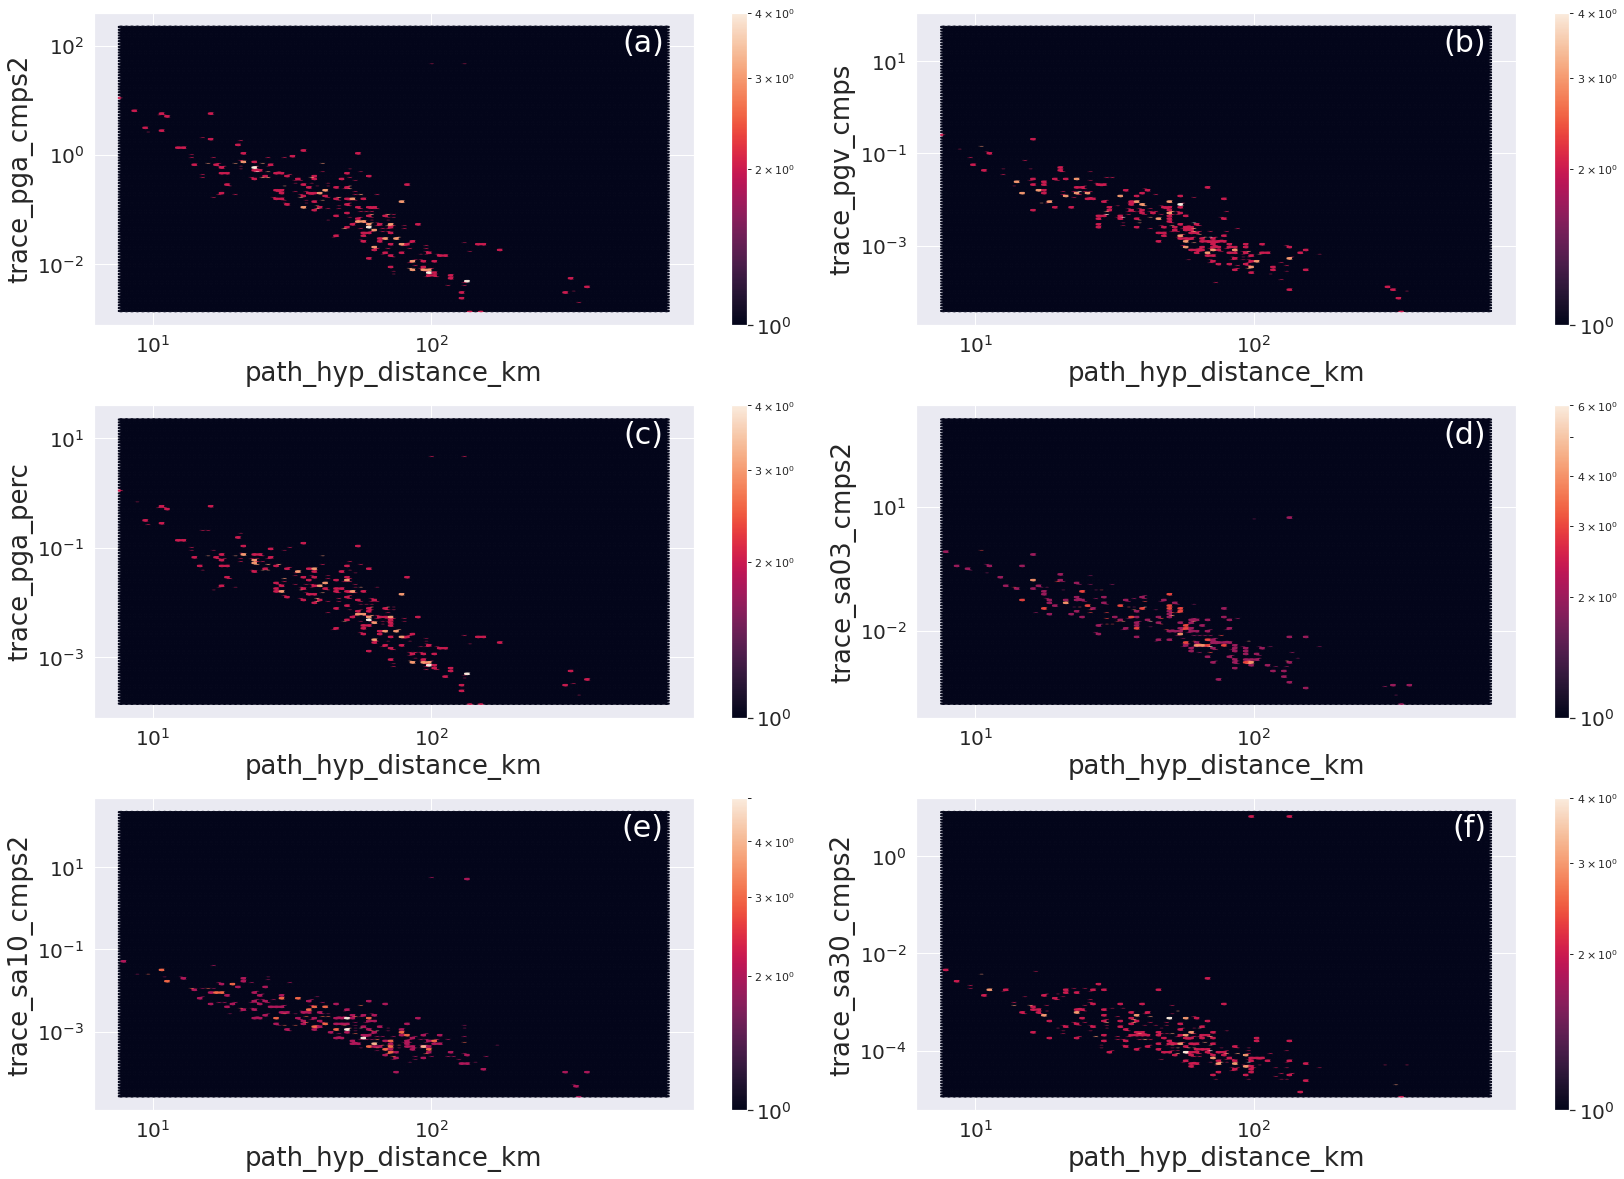

In [21]:
cols = [['path_hyp_distance_km','trace_pga_cmps2'],['path_hyp_distance_km','trace_pgv_cmps'],
        ['path_hyp_distance_km','trace_pga_perc'],['path_hyp_distance_km','trace_sa03_cmps2'],
        ['path_hyp_distance_km','trace_sa10_cmps2'],['path_hyp_distance_km','trace_sa30_cmps2']
       ]

lfs=26   # label font size
tlfs=20  # tick label font size

ncols = 2
nrows = 3
n_x_ticks=4  # number of ticks in the x axis
n_y_ticks=[5,4,
           4,4,
           4,4]

label_font_size=lfs*np.ones(nrows*ncols)
tick_label_font_size =tlfs*np.ones(nrows*ncols)

#
labs = alllabs[:(ncols*nrows)]
#
logs = [[True,True], [True,True],
        [True,True], [True,True],
        [True,True], [True,True]
       ]

ranges = [[0,700,0,220],[0,700,0,55],
          [0,700,0,22],[0,700,0,1250],
          [0,700,0,215],[0,700,0,8]
         ]

bins=['log','log','log','log','log','log']

style_label = 'seaborn-deep'

fig = plot_hexbin_panels(style_label, df_meta_IMs_M3, cols, ncols, nrows,
                          label_font_size, tick_label_font_size, labs, colors, logs, ranges,bins, n_y_ticks=n_y_ticks, gridsize=(100,100))

#figname = os.path.join(FIGDIR, "hexbin_IMs_M3.png")
#plt.savefig(figname)

plt.show()

## Figure A1
### Distribution of P- (left) and S-arrival (right) samples of the extracted waveform traces.

/homes/cianetti/.conda/envs/gpd/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/homes/cianetti/.conda/envs/gpd/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


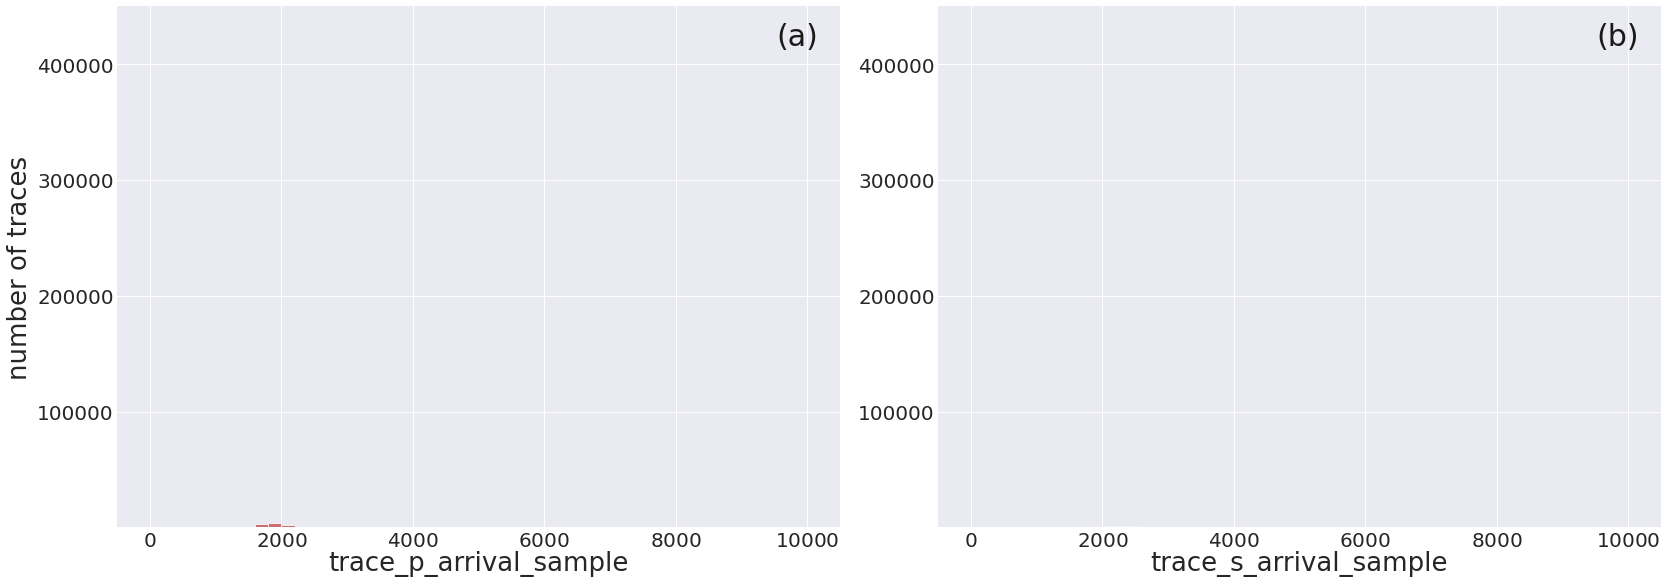

In [22]:
cols = ['trace_p_arrival_sample','trace_s_arrival_sample']

bins = [50,50]
ylabel_text = ['number of traces','']
label_font_size = [22,22]
#
tick_label_font_size = [15,15]
ncols = 2
nrows = 1
#

lfs=26   # label font size
tlfs=20  # tick label font size
n_x_ticks=4  # number of ticks in the x axis

n_y_ticks=[5,5]

label_font_size=lfs*np.ones(nrows*ncols)
tick_label_font_size =tlfs*np.ones(nrows*ncols)



colors = ['r','b']
logs = [False,False]

ranges = [[0,10000, 0.1, 450000],
          [0,10000, 0.1, 450000]]

labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=30

style_label = 'default'
style_label = 'seaborn-darkgrid'
#
fig = plot_histo_panels(style_label,df_metadata,cols,ncols,nrows,bins,ylabel_text,label_font_size,
                        tick_label_font_size, labs, colors,logs,ranges, n_y_ticks=n_y_ticks, c=color, fontsize=fontsize)

#figname = os.path.join(FIGDIR, "arrival_samples_zoom.png")
#plt.savefig(figname)

plt.show()

## Figure A2
### Histogram of the distribution of quality control metadata of the event waveforms: rms, min, max, first and third quartile. The width of the bins is $2 × 10^5$

/homes/cianetti/.conda/envs/gpd/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/homes/cianetti/.conda/envs/gpd/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


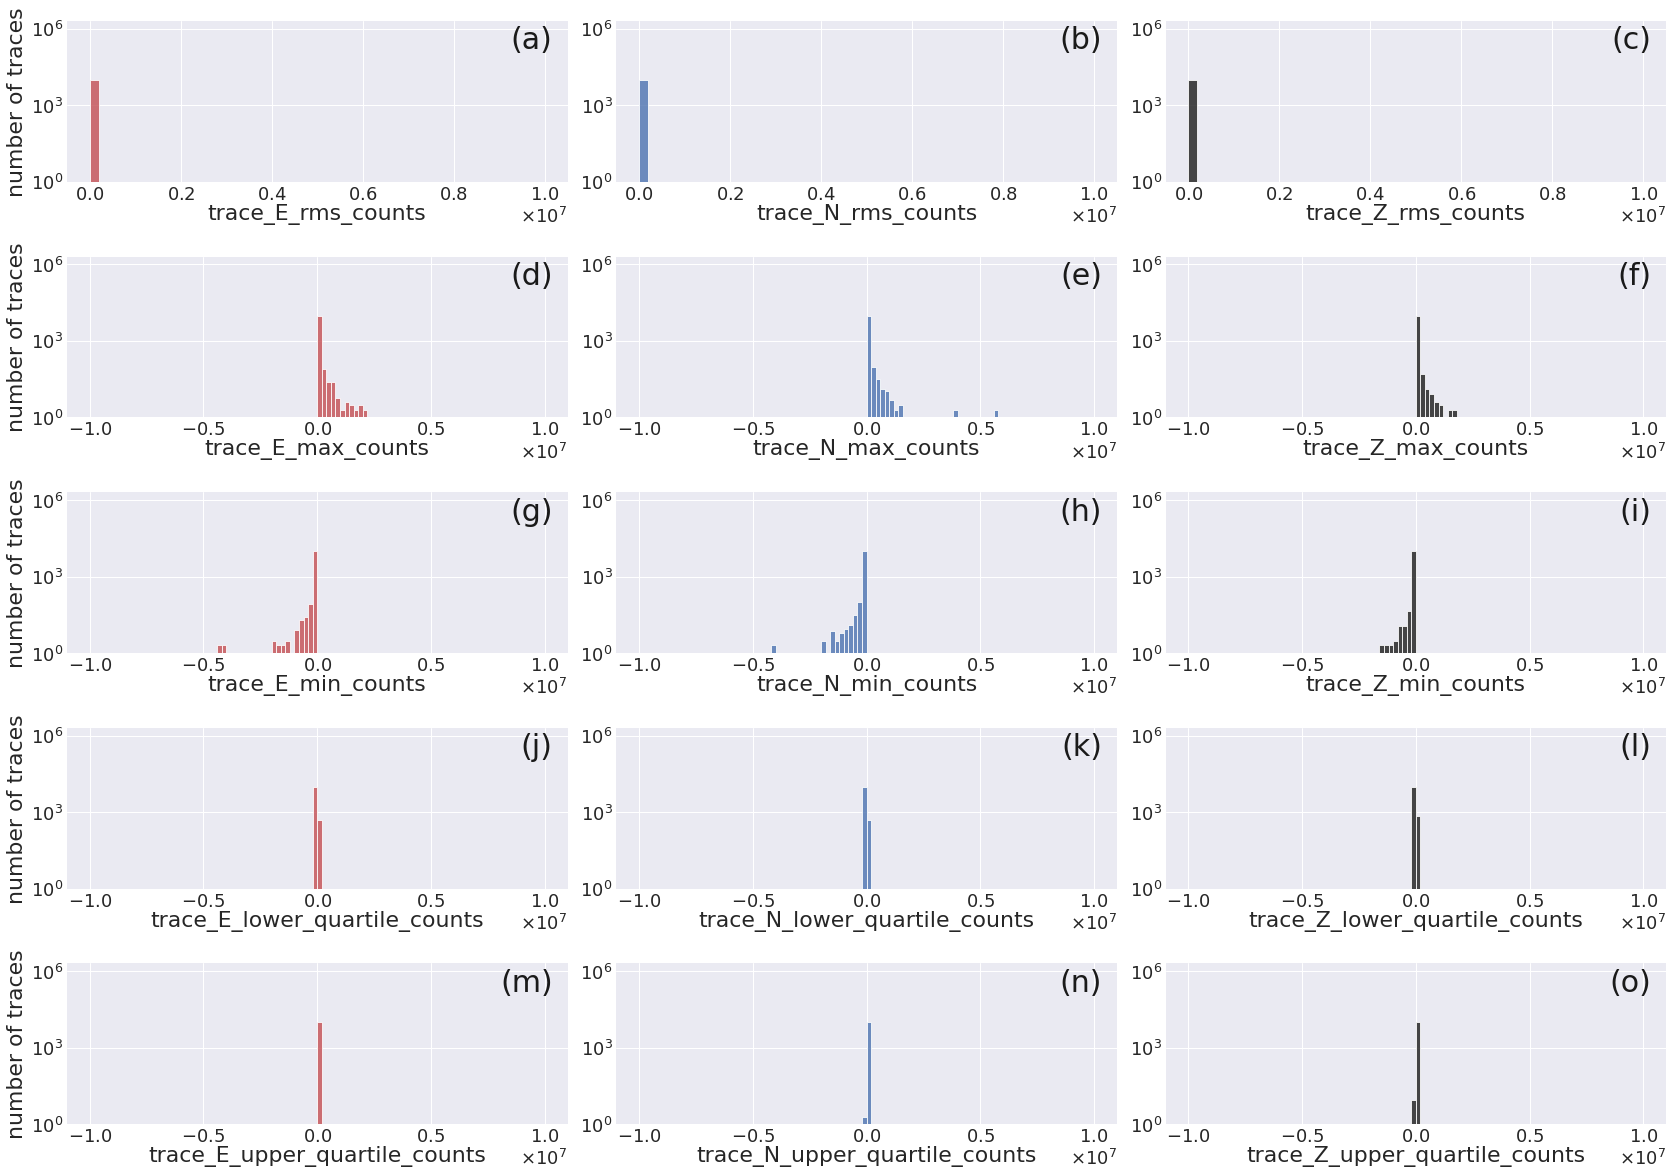

In [23]:
ncols = 3
nrows = 5

cols = [
        'trace_E_rms_counts','trace_N_rms_counts','trace_Z_rms_counts',
        'trace_E_max_counts','trace_N_max_counts','trace_Z_max_counts',
        'trace_E_min_counts','trace_N_min_counts','trace_Z_min_counts',
        'trace_E_lower_quartile_counts','trace_N_lower_quartile_counts','trace_Z_lower_quartile_counts',
        'trace_E_upper_quartile_counts','trace_N_upper_quartile_counts','trace_Z_upper_quartile_counts'
       ]

bins = [50,50,50,
        100,100,100,
        100,100,100,
        100,100,100,
        100,100,100]

ylabel_text = ['number of traces','','',
               'number of traces','','',
               'number of traces','','',
               'number of traces','','',
               'number of traces','','']

lfs=22   # label font size
tlfs=18  # tick label font size
n_x_ticks=[6,6,6,
           7,7,7,
           7,7,7,
           7,7,7,
           7,7,7]  # number of ticks in the x axis
n_y_ticks=[ 3,3,3,
          3,3,3,
          3,3,3,
          3,3,3,
          3,3,3]

label_font_size=lfs*np.ones(nrows*ncols)
tick_label_font_size =tlfs*np.ones(nrows*ncols)

#
labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=30

#
colors = ['r','b','k','r','b','k','r','b','k','r','b','k','r','b','k']

logs = [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True]
ranges = [
          [0,1e7,1,2000000],[0,1e7,1,2000000],[0,1e7,1,2000000],
          [-1e7,1e7,1,2000000],[-1e7,1e7,1,2000000],[-1e7,1e7,1,2000000],
          [-1e7,1e7,1,2000000],[-1e7,1e7,1,2000000],[-1e7,1e7,1,2000000],
          [-1e7,1e7,1,2000000],[-1e7,1e7,1,2000000],[-1e7,1e7,1,2000000],
          [-1e7,1e7,1,2000000],[-1e7,1e7,1,2000000],[-1e7,1e7,1,2000000]]

style_label = 'seaborn-darkgrid'
#
fig = plot_histo_panels(style_label,df_metadata,cols,ncols,nrows,bins,ylabel_text,label_font_size,
                        tick_label_font_size,labs, colors,logs,ranges, n_x_ticks=n_x_ticks, n_y_ticks=n_y_ticks, c=color, fontsize=fontsize)

#figname = os.path.join(FIGDIR, "QC_params_1.png")
#plt.savefig(figname)
plt.show()

## Figure A3
### Histograms of the distribution of the intensity measures (IMs) of the event waveforms for M ≥ 2 earthquakes.

/homes/cianetti/.conda/envs/gpd/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/homes/cianetti/.conda/envs/gpd/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


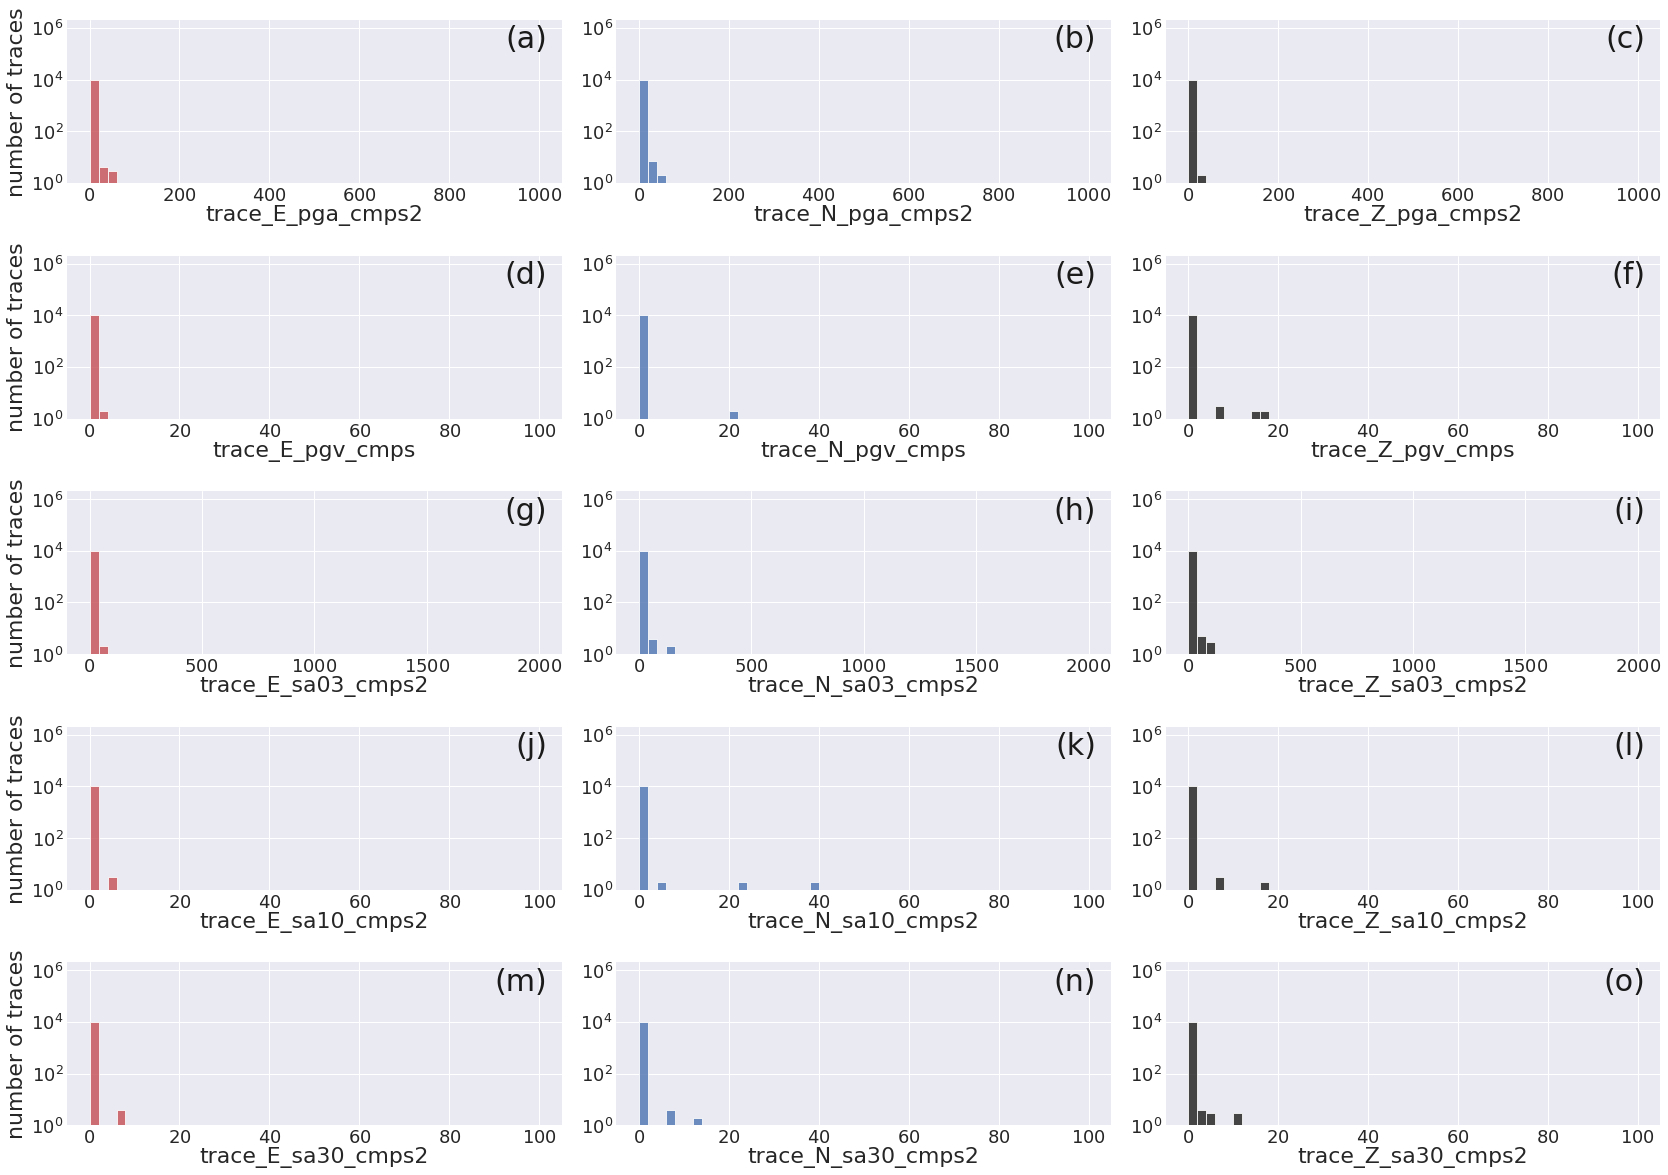

In [24]:
ncols = 3
nrows = 5

cols = ['trace_E_pga_cmps2','trace_N_pga_cmps2','trace_Z_pga_cmps2',
        'trace_E_pgv_cmps','trace_N_pgv_cmps','trace_Z_pgv_cmps',
        'trace_E_sa03_cmps2','trace_N_sa03_cmps2','trace_Z_sa03_cmps2',
        'trace_E_sa10_cmps2','trace_N_sa10_cmps2','trace_Z_sa10_cmps2',
        'trace_E_sa30_cmps2','trace_N_sa30_cmps2','trace_Z_sa30_cmps2'
       ]

bins = [50,50,50,
        50,50,50,
        50,50,50,
        50,50,50,
        50,50,50]

ylabel_text = ['number of traces','','','number of traces','','',
               'number of traces','','','number of traces','','', 'number of traces','','']

lfs=22   # label font size
tlfs=18  # tick label font size

n_x_ticks=[6,6,6,
          6,6,6,
          6,6,6,
          6,6,6,
          6,6,6]  # number of ticks in the x axis
n_y_ticks=[4,4,4,
           4,4,4,
           4,4,4,
           4,4,4,
           4,4,4]

label_font_size=lfs*np.ones(nrows*ncols)
tick_label_font_size =tlfs*np.ones(nrows*ncols)

labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=30

#
colors = ['r','b','k',
          'r','b','k',
          'r','b','k',
          'r','b','k',
          'r','b','k']

logs = [True,True,True,
        True,True,True,
        True,True,True,
        True,True,True,
        True,True,True]

ranges = [[0,1000,1,2000000],[0,1000,1,2000000],[0,1000,1,2000000],
          [0,100 ,1,2000000],[0,100 ,1,2000000],[0,100 ,1,2000000] ,
          [0,2000,1,2000000],[0,2000,1,2000000],[0,2000,1,2000000],
          [0,100 ,1,2000000],[0,100 ,1,2000000],[0,100 ,1,2000000] ,
          [0,100 ,1,2000000],[0,100 ,1,2000000],[0,100 ,1,2000000]  ]

style_label = 'seaborn-darkgrid'
#
fig = plot_histo_panels(style_label,df_metadata,cols,ncols,nrows,bins,ylabel_text,
                        label_font_size,tick_label_font_size,labs,colors,logs,ranges, n_x_ticks=n_x_ticks, n_y_ticks=n_y_ticks, c=color, fontsize=fontsize)

#figname = os.path.join(FIGDIR, "pga_pgv_sa03_separate_horizontal.png")
#plt.savefig(figname)
plt.show()

# Metadata noise plots

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})



In [26]:
%time df_metadata_noise = pd.read_csv(noisefile, dtype={'scnl_loc': object})

CPU times: user 75.2 ms, sys: 12 ms, total: 87.2 ms
Wall time: 84.5 ms


## Figure 17
### Noise dataset: pie diagrams summarizing the distribution of:
- the channels (a) 
- the data contributing networks (b) 

In [27]:
df_grouped = []
cols = ['station_channels', 'station_network_code']
# cols = ['station_channels', 'station_network_code']
for col in cols:
    df_grouped.append(df_metadata_noise.groupby(col).count())
nrows,ncols = (1,2)

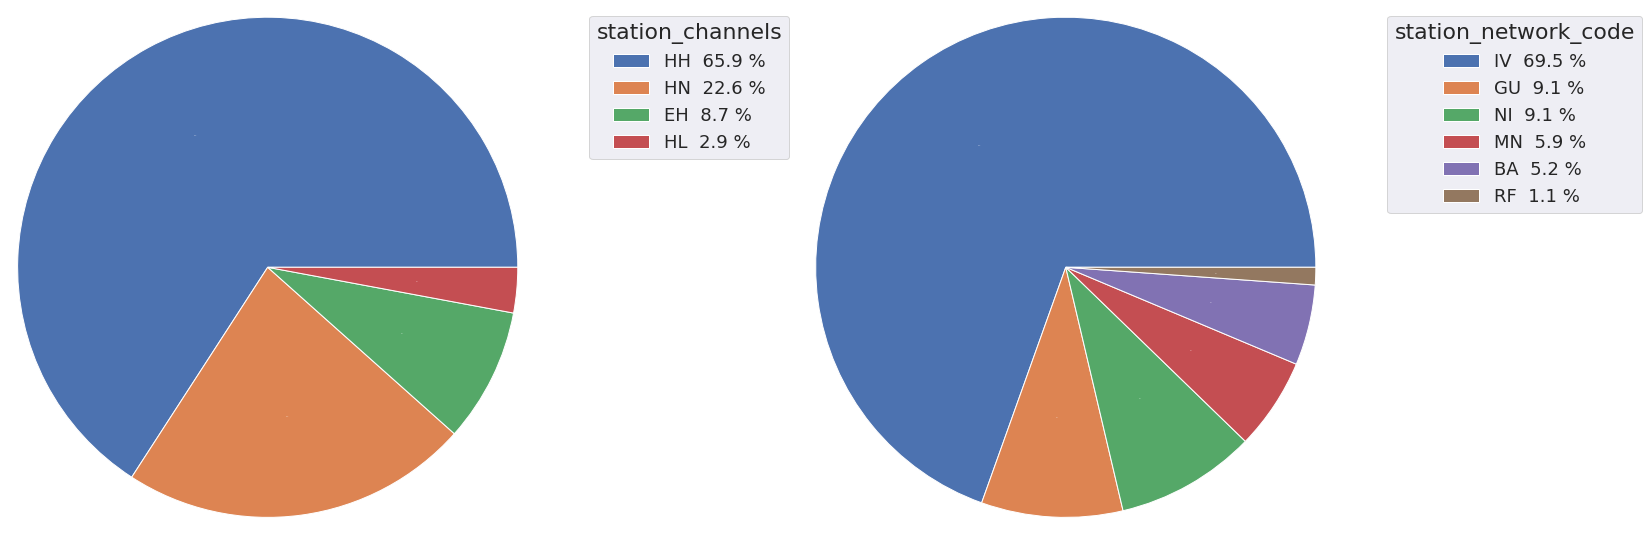

In [28]:
lfs=22   # label font size
tlfs=18

label_font_size=lfs*np.ones(ncols*nrows)
tick_font_size=tlfs*np.ones(ncols*nrows)

labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=25

MinPerc=[0.0001, 1]   # Percentuale minima oltre la quale categorizzare come Others

fig = plot_pie_panels(df_grouped, cols, ncols, nrows, label_font_size, tick_font_size, PercMIN=MinPerc, top=1, left=-0.1, wspace=-0.1, fontsize=fontsize, c=color)

#figname = os.path.join(FIGDIR, "pie_cha_net_noise_Soglia1.png")
#plt.savefig(figname)
plt.show()

## Figure 18
### Histogram of the distribution of the noise quality control metadata: rms, min, max, first and third quartile. The width of the bins is $2 × 10^3$

KeyError: 'trace_E_median_counts'

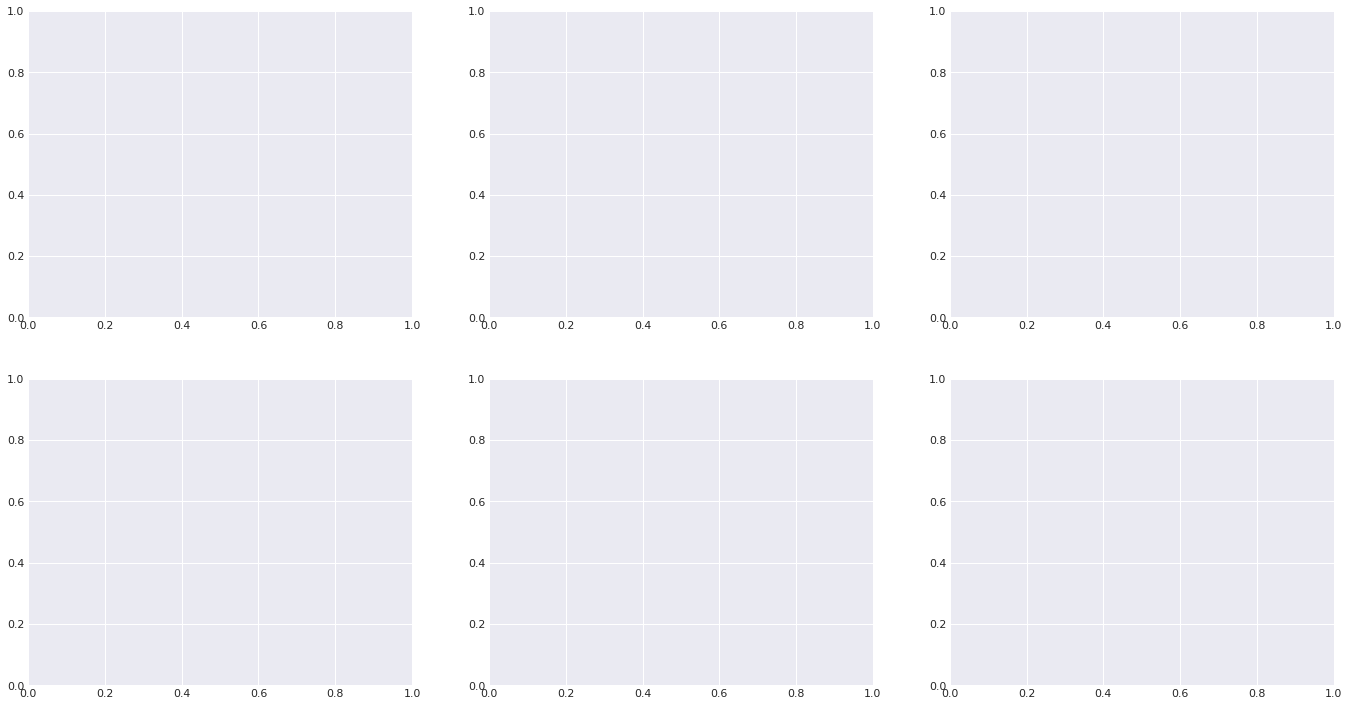

In [29]:
ncols = 3
nrows = 2

cols = ['trace_E_median_counts','trace_N_median_counts','trace_Z_median_counts',
        'trace_E_mean_counts','trace_N_mean_counts','trace_Z_mean_counts'
       ]

bins = [51,51,51,
        51,51,51]

ylabel_text = ['number of traces','','','number of traces','','']

lfs=26   # label font size
tlfs=20  # tick label font size

n_x_ticks=[5,5,5,
          5,5,5]  # number of ticks in the x axis
n_y_ticks=7

label_font_size=lfs*np.ones(nrows*ncols)
tick_label_font_size =tlfs*np.ones(nrows*ncols)

colors = ['r','b','k','r','b','k']

labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=30

logs = [True,True,True,
        True,True,True]

ranges = [[-50,50,1,200000],[-50,50,1,200000],[-50,50,1,200000],
          [-50,50,1,200000],[-50,50,1,200000],[-50,50,1,200000]
         ]

style_label = 'seaborn-darkgrid'
#
fig = plot_histo_panels(style_label,df_metadata_noise,cols,ncols,nrows,bins,ylabel_text,
                        label_font_size,tick_label_font_size,labs, colors,logs,ranges, n_x_ticks=n_x_ticks, c=color, fontsize=fontsize)

#figname = os.path.join(FIGDIR, "median_mean_log_noise_Zoom.png")
#plt.savefig(figname)
plt.show()

## Figure 19
### Histogram of the distribution of the noise quality control metadata: rms, min, max, first and third quartile. The width of the bins is $2 × 10^3$

KeyError: 'trace_E_rms_counts'

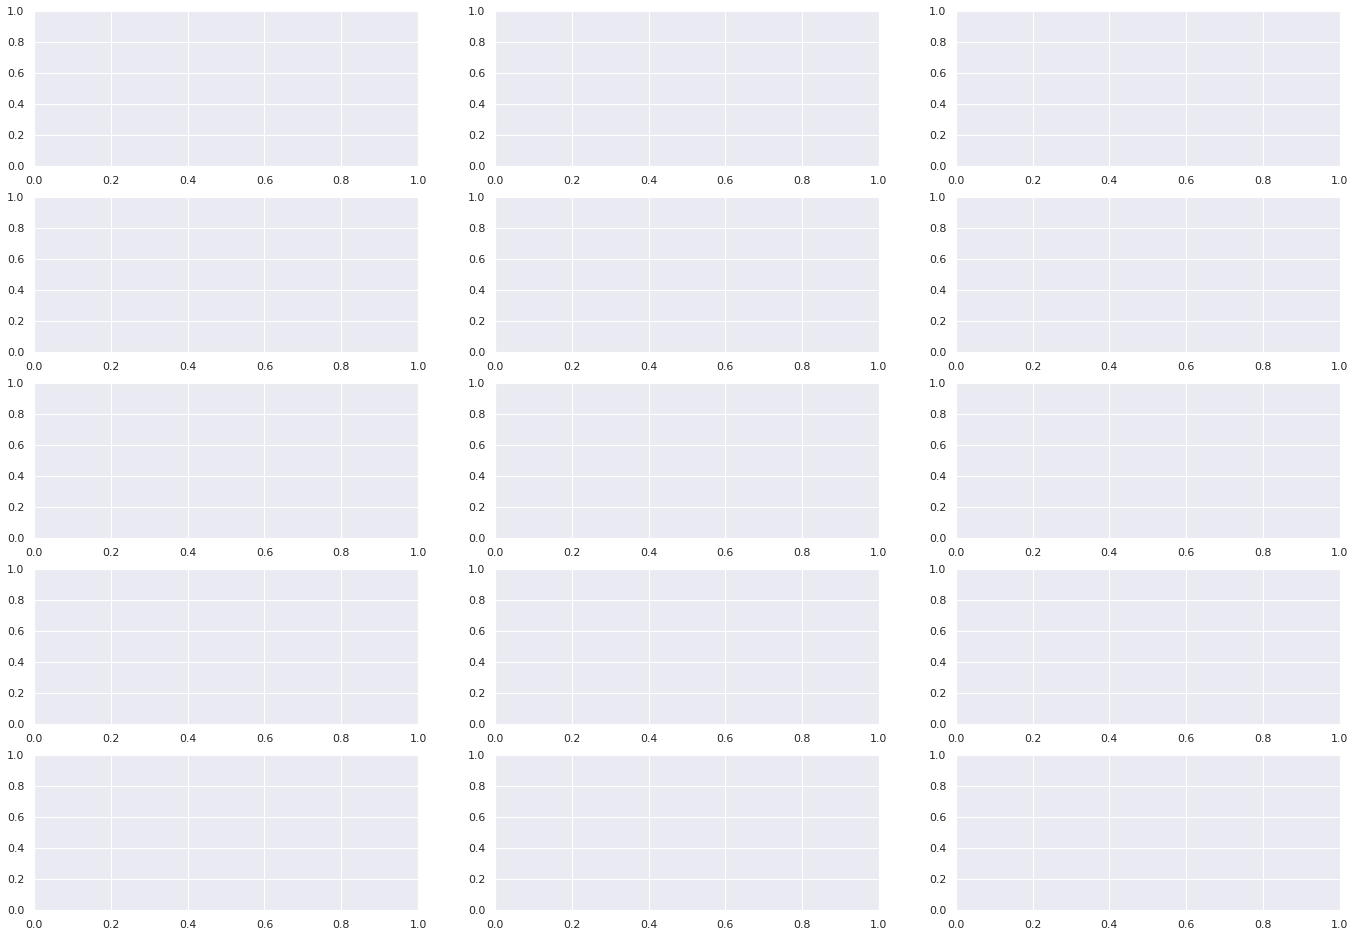

In [30]:
ncols = 3
nrows = 5

cols = [
        'trace_E_rms_counts','trace_N_rms_counts','trace_Z_rms_counts',
        'trace_E_max_counts','trace_N_max_counts','trace_Z_max_counts',
        'trace_E_min_counts','trace_N_min_counts','trace_Z_min_counts',
        'trace_E_lower_quartile_counts','trace_N_lower_quartile_counts','trace_Z_lower_quartile_counts',
        'trace_E_upper_quartile_counts','trace_N_upper_quartile_counts','trace_Z_upper_quartile_counts'
       ]

bins = [50,50,50,
        100,100,100,
        100,100,100,
        100,100,100,
        100,100,100]

ylabel_text = ['number of traces','','',
               'number of traces','','',
               'number of traces','','',
               'number of traces','','',
               'number of traces','','']

lfs=22   # label font size
tlfs=18  # tick label font size

n_x_ticks=[6,6,6,
          5,5,5,
          5,5,5,
          5,5,5,
          5,5,5]  # number of ticks in the x axis
n_y_ticks=[5,5,5,
           6,6,6,
           6,6,6,
           6,6,6,
           6,6,6]

labs = alllabs[:(ncols*nrows)]

label_font_size=lfs*np.ones(nrows*ncols)
tick_label_font_size =tlfs*np.ones(nrows*ncols)

color='k'
fontsize=30

#
colors = ['r','b','k','r','b','k','r','b','k','r','b','k','r','b','k']

logs = [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True]

ranges = [
          [0,1e5,1,500000],[0,1e5,1,500000],[0,1e5,1,500000],
          [-1e5,1e5,1,500000],[-1e5,1e5,1,500000],[-1e5,1e5,1,500000],
          [-1e5,1e5,1,500000],[-1e5,1e5,1,500000],[-1e5,1e5,1,500000],
          [-1e5,1e5,1,500000],[-1e5,1e5,1,500000],[-1e5,1e5,1,500000],
          [-1e5,1e5,1,500000],[-1e5,1e5,1,500000],[-1e5,1e5,1,500000]]

style_label = 'seaborn-deep'

fig = plot_histo_panels(style_label,df_metadata_noise,cols,ncols,nrows,bins,ylabel_text,label_font_size,
                        tick_label_font_size,labs, colors,logs,ranges,n_x_ticks=n_x_ticks, n_y_ticks=n_y_ticks,  c=color, fontsize=fontsize)

#figname = os.path.join(FIGDIR, "QC_params_1_zoom_noise.png")
#plt.savefig(figname)
plt.show()

## Figure A4
### Histogram of the distribution of the noise quality control metadata: rms, min, max, first and third quartile. The width of the bins is $2 × 10^3$

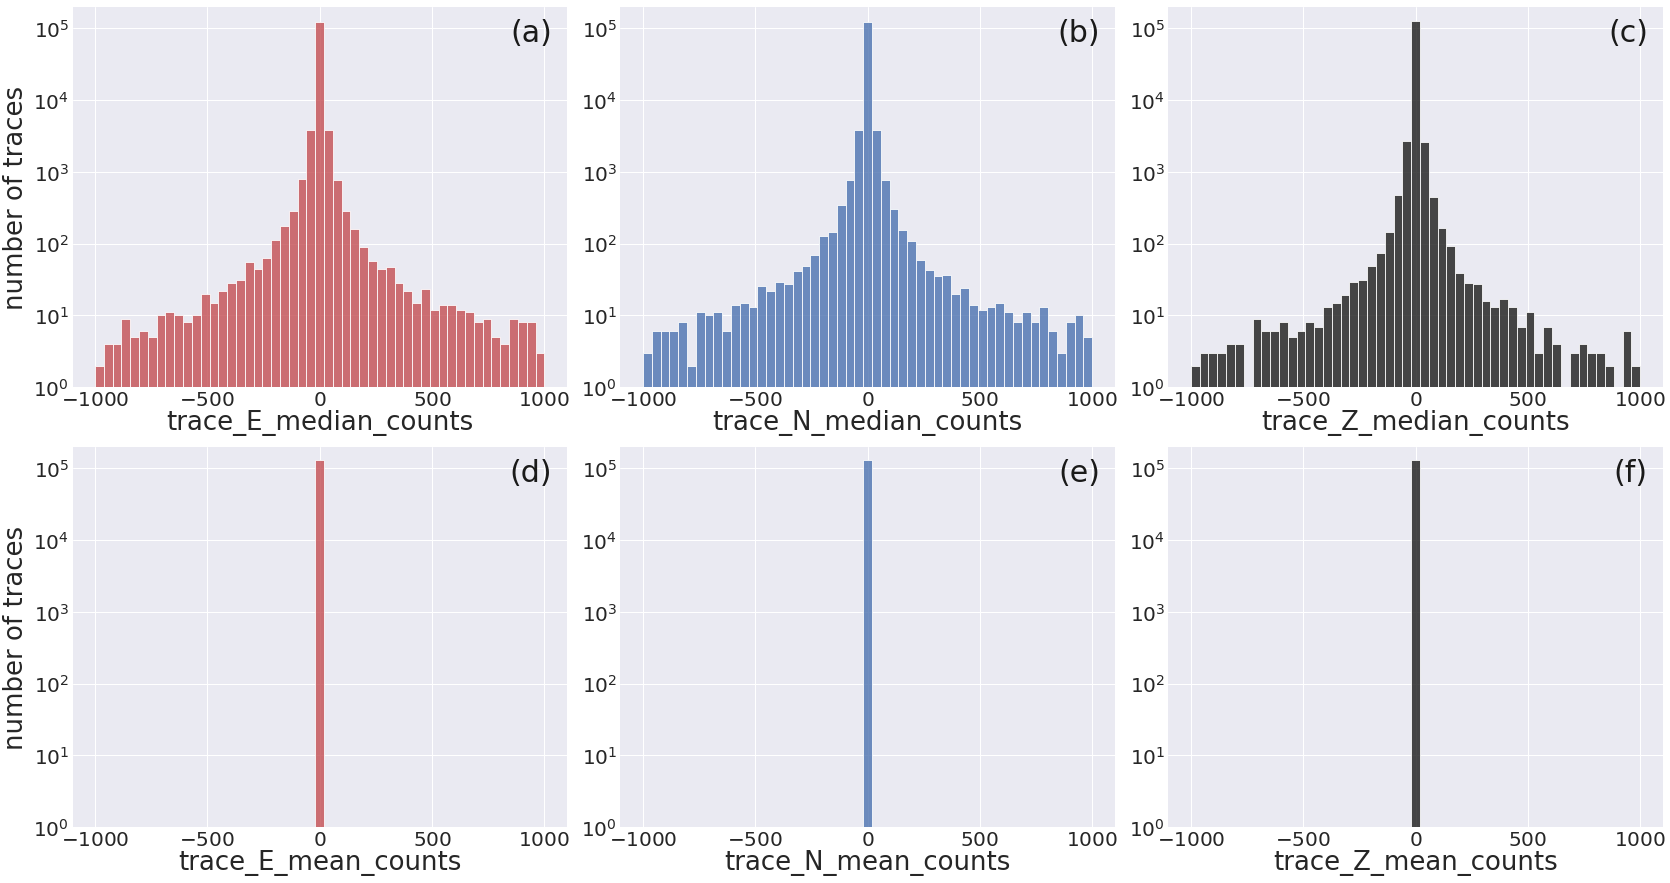

In [31]:
ncols = 3
nrows = 2

cols = ['trace_E_median_counts','trace_N_median_counts','trace_Z_median_counts',
        'trace_E_mean_counts','trace_N_mean_counts','trace_Z_mean_counts'
       ]

bins = [51,51,51,
        51,51,51]

ylabel_text = ['number of traces','','','number of traces','','']

lfs=26   # label font size
tlfs=20  # tick label font size

n_x_ticks=[5,5,5,
          5,5,5]  # number of ticks in the x axis
n_y_ticks=7

label_font_size=lfs*np.ones(nrows*ncols)
tick_label_font_size =tlfs*np.ones(nrows*ncols)

colors = ['r','b','k','r','b','k']

labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=30

logs = [True,True,True,
        True,True,True]

ranges = [[-1000,1000,1,200000],[-1000,1000,1,200000],[-1000,1000,1,200000],
          [-1000,1000,1,200000],[-1000,1000,1,200000],[-1000,1000,1,200000]
         ]

style_label = 'seaborn-darkgrid'
#
fig = plot_histo_panels(style_label,df_metadata_noise,cols,ncols,nrows,bins,ylabel_text,
                        label_font_size,tick_label_font_size,labs, colors,logs,ranges, n_x_ticks=n_x_ticks, c=color, fontsize=fontsize)

#figname = os.path.join(FIGDIR, "median_mean_log_noise.png")
#plt.savefig(figname)
plt.show()

## Figure A5
### Histogram of the distribution of noise quality control metadata: rms, min, max, first and third quartile. The width of the bins is $2 × 10^5$

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


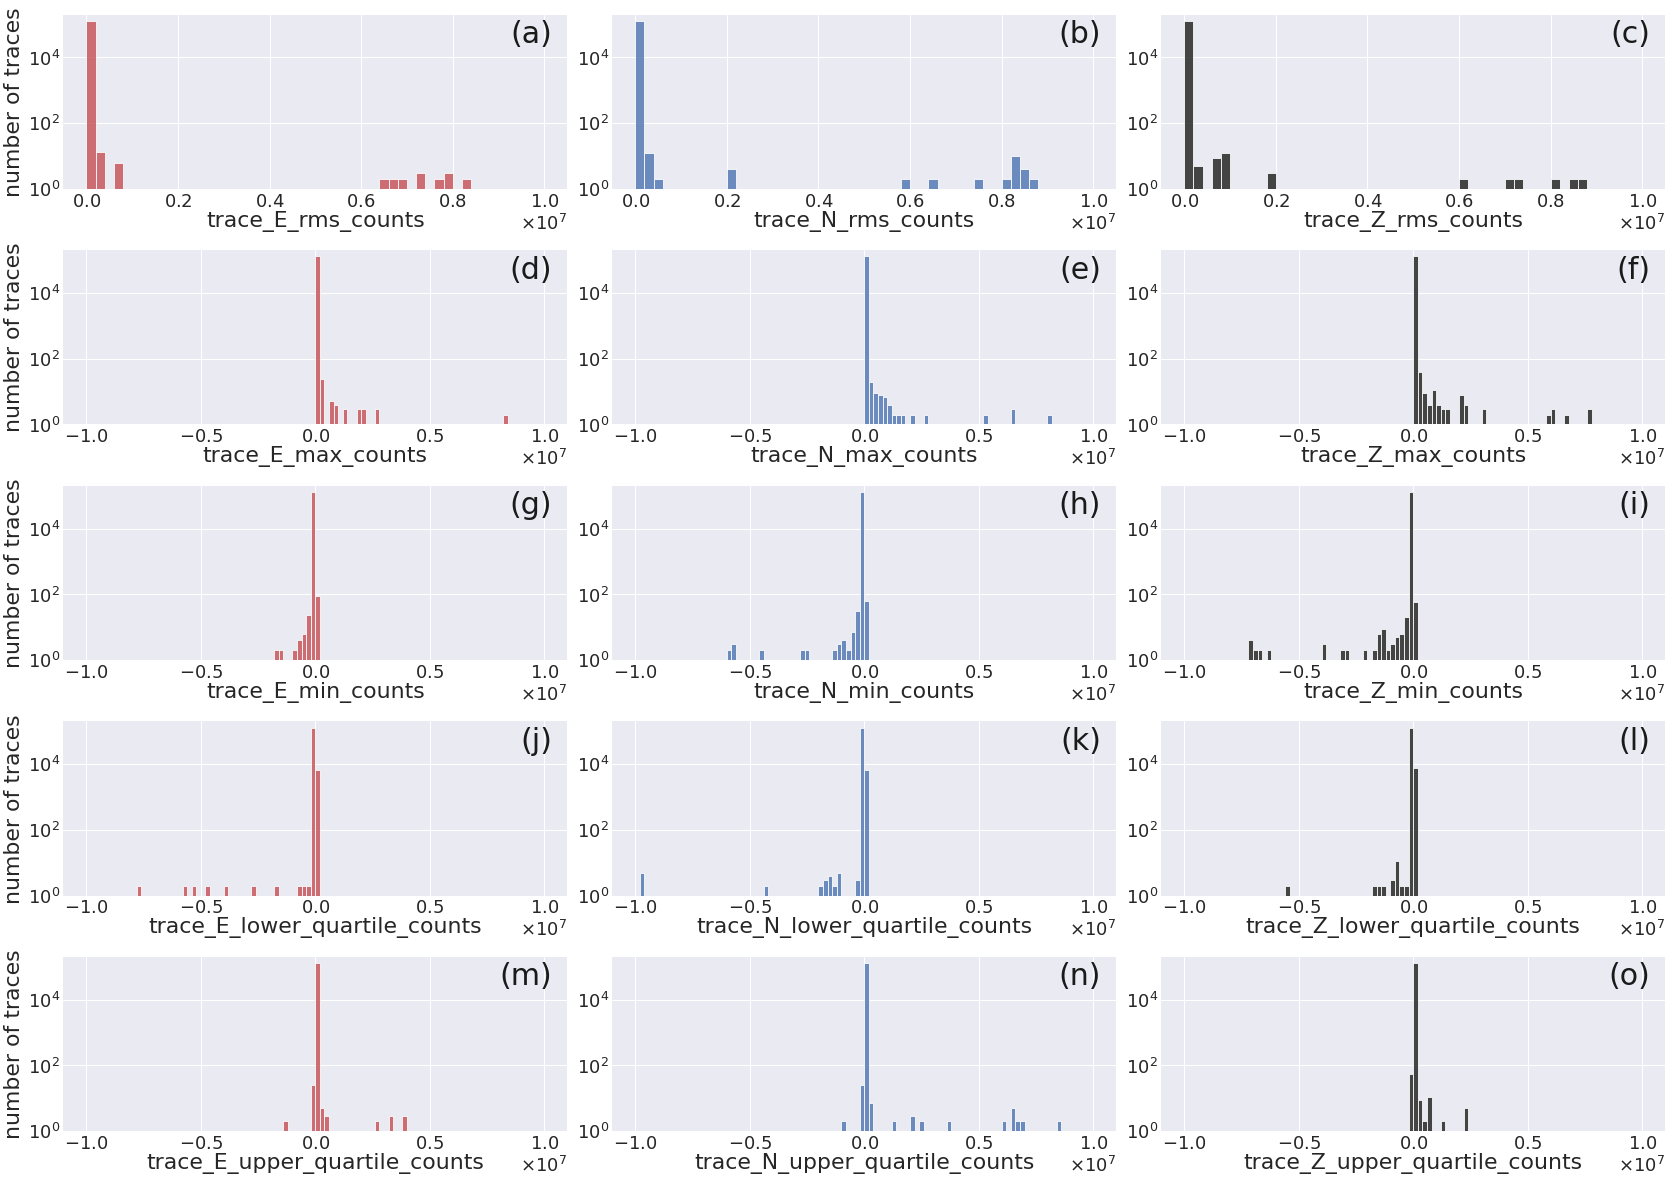

In [32]:
import matplotlib.ticker as ticker
ncols = 3
nrows = 5

cols = [
        'trace_E_rms_counts','trace_N_rms_counts','trace_Z_rms_counts',
        'trace_E_max_counts','trace_N_max_counts','trace_Z_max_counts',
        'trace_E_min_counts','trace_N_min_counts','trace_Z_min_counts',
        'trace_E_lower_quartile_counts','trace_N_lower_quartile_counts','trace_Z_lower_quartile_counts',
        'trace_E_upper_quartile_counts','trace_N_upper_quartile_counts','trace_Z_upper_quartile_counts'
       ]

bins = [50,50,50,
        100,100,100,
        100,100,100,
        100,100,100,
        100,100,100]

ylabel_text = ['number of traces','','',
               'number of traces','','',
               'number of traces','','',
               'number of traces','','',
               'number of traces','','']

lfs=22   # label font size
tlfs=18  # tick label font size
n_p=15
n_x_ticks=[6,6,6,
          5,5,5,
          5,5,5,
          5,5,5,
          5,5,5]  # number of ticks in the x axis
n_y_ticks=[4,4,4,
          4,4,4,
          4,4,4,
          4,4,4,
          4,4,4]

label_font_size=lfs*np.ones(nrows*ncols)
tick_label_font_size =tlfs*np.ones(nrows*ncols)

labs = alllabs[:(ncols*nrows)]
color='k'
fontsize=30

colors = ['r','b','k','r','b','k','r','b','k','r','b','k','r','b','k']

logs = [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True]

ranges = [
          [0,1e7,1,200000],[0,1e7,1,200000],[0,1e7,1,200000] ,
          [-1e7,1e7,1,200000],[-1e7,1e7,1,200000],[-1e7,1e7,1,200000],
          [-1e7,1e7,1,200000],[-1e7,1e7,1,200000],[-1e7,1e7,1,200000],
          [-1e7,1e7,1,200000],[-1e7,1e7,1,200000],[-1e7,1e7,1,200000],
          [-1e7,1e7,1,200000],[-1e7,1e7,1,200000],[-1e7,1e7,1,200000]]

style_label = 'seaborn-darkgrid'
#
fig = plot_histo_panels(style_label,df_metadata_noise,cols,ncols,nrows,bins,ylabel_text,label_font_size,
                        tick_label_font_size,labs, colors,logs,ranges, n_x_ticks=n_x_ticks, n_y_ticks=n_y_ticks, c=color, fontsize=fontsize)

#figname = os.path.join(FIGDIR, "QC_params_1_noise.png")
#plt.savefig(figname)
plt.show()